In [1]:
import pandas as pd
import pyam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import aneris

In [2]:
globio_path = '../../../data/TOD/model_results/raw/GLOBIO_GEO7_clean.xlsx'
area_path = '../../../data/TOD/model_results/raw/FOD_GLOBIO_reporting_GEO7_with_Area.xlsx'

In [3]:
def round_to_0_1_percent(value):
    if value == 0:
        return 0
    # Determine the number of significant digits to round to
    magnitude = np.floor(np.log10(abs(value))) - 2
    rounding_factor = 10 ** magnitude
    return np.round(value / rounding_factor) * rounding_factor

In [4]:
df_unclean = pd.read_excel(globio_path)
df_unclean['Scenario'] = df_unclean['Scenario'].replace({'CONS-19': 'LIFE-TP-v2',
                                                   'TECH-19': 'TECH-TP-v2',
                                                   'REF':'REF-v2'
                                                  })

region_dict = {
    'Brazil': 'BRA',
    'Canada': 'CAN',
    'Central Europe': 'CEU' ,
    'China region': 'CHN' ,
    'Eastern Africa': 'EAF' ,
    'India': 'INDIA' ,
    'Indonesia region': 'INDO',
    'Japan': 'JAP',
    'Korea region': 'KOR' ,
    'Middle East': 'ME' ,
    'Mexico': 'MEX',
    'Northern Africa': 'NAF' ,
    'Oceania': 'OCE',
    'Rest of Central America': 'RCAM',
    'Rest of Southern Africa': 'RSAF',
    'Rest of South America': 'RSAM',
    'Rest of South Asia': 'RSAS',
    'Russia region': 'RUS',
    'South Africa': 'SAF',
    'Southeast Asia': 'SEAS',
    'Central Asia': 'STAN',
    'Turkey': 'TUR',
    'Ukraine region': 'UKR',
    'USA': 'USA',
    'Western Africa': 'WAF',
    'Western Europe': 'WEU',
}

df_unclean['Region'] = df_unclean['Region'].replace(region_dict)
df_unclean['Model'] = df_unclean['Model'].replace({'IMAGE-GLOBIO':'IMAGE-GLOBIO 3.3'})
df_unclean['Unit'] = '%'
# Create a boolean mask for rows where the 'unit' column contains '%'
ratio_mask = df_unclean['Unit'] == '%'
# Apply rounding to the 'value' column for rows where the 'unit' column is '%'
df_unclean.loc[ratio_mask, df_unclean.columns[5:]] = round(df_unclean.loc[ratio_mask, df_unclean.columns[5:]] * 100)
df_unclean

,Model,Scenario,Region,Variable,Unit,2000,2005,2010,2015,2020,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,IMAGE-GLOBIO 3.3,REF-v2,CAN,Terrestrial Biodiversity|MSA,%,81.0,NaN,NaN,NaN,79.0,...,NaN,NaN,NaN,72.0,NaN,NaN,NaN,NaN,NaN,68.0
1,IMAGE-GLOBIO 3.3,REF-v2,CAN,Terrestrial Biodiversity|MSA|Plants,%,76.0,NaN,NaN,NaN,74.0,...,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,60.0
2,IMAGE-GLOBIO 3.3,REF-v2,CAN,Terrestrial Biodiversity|MSA Loss|Plants|Press...,%,7.0,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,21.0
3,IMAGE-GLOBIO 3.3,REF-v2,CAN,Terrestrial Biodiversity|MSA Loss|Plants|Press...,%,7.0,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,10.0
4,IMAGE-GLOBIO 3.3,REF-v2,CAN,Terrestrial Biodiversity|MSA Loss|Plants|Press...,%,9.0,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,IMAGE-GLOBIO 3.3,LIFE-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Vertebrates|...,%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,6.0
1373,IMAGE-GLOBIO 3.3,LIFE-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Vertebrates|...,%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,20.0
1374,IMAGE-GLOBIO 3.3,LIFE-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Vertebrates|...,%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0
1375,IMAGE-GLOBIO 3.3,LIFE-TP-v2,World,Terrestrial Biodiversity|MSA Loss|Vertebrates|...,%,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0


In [5]:
df_area =  pd.read_excel(area_path, sheet_name='data')
df_area = df_area[['Model', 'Scenario', 'Region', 'Variable', 'Unit', 2000,  2015, 2030,  2050, ]]
df_area = df_area.rename(columns={2015:2020}, )
df_area.Scenario = df_area.Scenario.replace({
                             'LIFE-TP': 'LIFE-TP-v2',
                             'TECH-TP': 'TECH-TP-v2',
                             'REF':'REF-v2'}, 
                         )
df_area = df_area[df_area['Variable'] == 'Area'].reset_index(drop=True)
# year=[2000, 2010, 2020, 2030, 2040, 2050, 2060]
# df_area.filter(variable='Area', ).timeseries()
# df_area.columns
df_area.loc[:, df_area.columns[5:]] = df_area.loc[:, df_area.columns[5:]].applymap(round_to_0_1_percent)
df_area

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_8632\33731861.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_area.loc[:, df_area.columns[5:]] = df_area.loc[:, df_area.columns[5:]].applymap(round_to_0_1_percent)


,Model,Scenario,Region,Variable,Unit,2000,2020,2030,2050
0,IMAGE-GLOBIO 3.3,REF-v2,CAN,Area,km2,8810000.0,8810000.0,8810000.0,8810000.0
1,IMAGE-GLOBIO 3.3,REF-v2,USA,Area,km2,9120000.0,9120000.0,9120000.0,9120000.0
2,IMAGE-GLOBIO 3.3,REF-v2,MEX,Area,km2,1940000.0,1940000.0,1940000.0,1940000.0
3,IMAGE-GLOBIO 3.3,REF-v2,RCAM,Area,km2,731000.0,731000.0,731000.0,731000.0
4,IMAGE-GLOBIO 3.3,REF-v2,BRA,Area,km2,8380000.0,8380000.0,8380000.0,8380000.0
...,...,...,...,...,...,...,...,...,...
99,IMAGE-GLOBIO 3.3,LIFE-TP-v2,INDO,Area,km2,NaN,NaN,2350000.0,2350000.0
100,IMAGE-GLOBIO 3.3,LIFE-TP-v2,JAP,Area,km2,NaN,NaN,367000.0,367000.0
101,IMAGE-GLOBIO 3.3,LIFE-TP-v2,OCE,Area,km2,NaN,NaN,8050000.0,8050000.0
102,IMAGE-GLOBIO 3.3,LIFE-TP-v2,RSAS,Area,km2,NaN,NaN,1890000.0,1890000.0


In [6]:
df_mid_clean = pyam.concat([df_unclean, df_area])
df_mid_clean = df_mid_clean.filter(year=[2000, 2010, 2020, 2030, 2040, 2050, 2060])

# Harmonize

In [7]:
df_copy = df_mid_clean.timeseries()
# Remove the model level from index
# df_copy = df_copy.reset_index(level='model', drop=True)
df_copy.columns = df_copy.columns.astype(str)

hist_filtered = df_mid_clean.filter(scenario='REF-v2', year=[2020]).timeseries()
# hist_filtered = hist_filtered.copy().reset_index(level='model', drop=True)
hist_filtered.columns = hist_filtered.columns.astype(str)

def change_first_level_index_value(df, old_value, new_value):
    new_index = df.index.to_frame()  # Convert index to DataFrame
    new_index.loc[new_index['scenario'] == old_value, 'scenario'] = new_value  # Change the values
    new_df = df.copy()
    new_df.index = pd.MultiIndex.from_frame(new_index)  # Convert back to MultiIndex
    return new_df

# Change 'A' to 'C' in the first level of the MultiIndex
life_hist = change_first_level_index_value(hist_filtered, 'REF-v2', 'LIFE-TP-v2')
tech_hist = change_first_level_index_value(hist_filtered, 'REF-v2', 'TECH-TP-v2')

hist_conc = pd.concat([hist_filtered, life_hist, tech_hist])
df_copy['2020'] = hist_conc['2020']
df_copy

2000  \
model            scenario   region variable                                           unit         
IMAGE-GLOBIO 3.3 LIFE-TP-v2 BRA    Area                                               km2    NaN   
                                   Terrestrial Biodiversity|MSA                       %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %      NaN   
...                                                                                          ...   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                   Terrestrial Biodiversity|MSA|Plants                %      NaN   
                                   Terrestrial Biodiversity|MSA|Vertebrates           %      NaN   

                                                                                                 2020  \
model            scenario   region variable                                           unit              
IMAGE-GLOBIO 3.3 LIFE-TP-v2 BRA    Area                                               km2   8380000.0   
                                   Terrestrial Biodiversity|MSA                       %          54.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %           7.0   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %           2.0   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %           3.0   
...                                                                                               ...   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %           6.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %           5.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %          20.0   
                                   Terrestrial Biodiversity|MSA|Plants                %          58.0   
                                   Terrestrial Biodiversity|MSA|Vertebrates           %          61.0   

                                                                                                 2030  \
model            scenario   region variable                                           unit              
IMAGE-GLOBIO 3.3 LIFE-TP-v2 BRA    Area                                               km2   8380000.0   
                                   Terrestrial Biodiversity|MSA                       %          53.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %           8.0   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %           2.0   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %           2.0   
...                                                                                               ...   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %           6.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %           6.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %          20.0   
                                   Terrestrial Biodiversity|MSA|Plants                %          57.0   
                                   Terrestrial Biodiversity|MSA|Vertebrates           %          60.0   

                                                           

In [8]:
df_clean = pyam.IamDataFrame(df_copy)
df_clean = df_clean.filter(scenario='REF-1p5C', keep=False)
df_clean.to_excel(('../../../data/TOD/model_results/processed/GLOBIO_results_processed.xlsx'))
df_clean.timeseries()

2000  \
model            scenario   region variable                                           unit         
IMAGE-GLOBIO 3.3 LIFE-TP-v2 BRA    Area                                               km2    NaN   
                                   Terrestrial Biodiversity|MSA                       %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %      NaN   
...                                                                                          ...   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                   Terrestrial Biodiversity|MSA|Plants                %      NaN   
                                   Terrestrial Biodiversity|MSA|Vertebrates           %      NaN   

                                                                                                 2020  \
model            scenario   region variable                                           unit              
IMAGE-GLOBIO 3.3 LIFE-TP-v2 BRA    Area                                               km2   8380000.0   
                                   Terrestrial Biodiversity|MSA                       %          54.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %           7.0   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %           2.0   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %           3.0   
...                                                                                               ...   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %           6.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %           5.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %          20.0   
                                   Terrestrial Biodiversity|MSA|Plants                %          58.0   
                                   Terrestrial Biodiversity|MSA|Vertebrates           %          61.0   

                                                                                                 2030  \
model            scenario   region variable                                           unit              
IMAGE-GLOBIO 3.3 LIFE-TP-v2 BRA    Area                                               km2   8380000.0   
                                   Terrestrial Biodiversity|MSA                       %          53.0   
                                   Terrestrial Biodiversity|MSA Loss|Encroachment     %           8.0   
                                   Terrestrial Biodiversity|MSA Loss|Fragmentation    %           2.0   
                                   Terrestrial Biodiversity|MSA Loss|Infrastructur... %           2.0   
...                                                                                               ...   
                 TECH-TP-v2 World  Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %           6.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %           6.0   
                                   Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %          20.0   
                                   Terrestrial Biodiversity|MSA|Plants                %          57.0   
                                   Terrestrial Biodiversity|MSA|Vertebrates           %          60.0   

                                                           

In [9]:
def compute_UN_groups(df, variables, weight=None):
    
    df_africa = df.aggregate_region(variables,
                              region='Africa (UN-R5)',
                              subregions=[
                                    'NAF',
                                    'WAF',
                                    'EAF',
                                    'SAF',
                                    'RSAF',
                              ],
                              weight=weight
                              )

    df_asia = df.aggregate_region(variables,
                              region='Asia and the Pacific (UN-R5)',
                              subregions=[
                                'CHN',
                                'INDIA',
                                'INDO',
                                'JAP',
                                'KOR',
                                'ME',
                                'RSAS',
                                'SEAS',
                                'STAN',
                              ],
                              weight=weight
                              )

    df_ee = df.aggregate_region(variables,
                              region='Eastern Europe (UN-R5)',
                              subregions=[
                                    'CEU',
                                    'RUS',
                                    'UKR',
                              ],
                              weight=weight
                              )

    df_latin = df.aggregate_region(variables,
                              region='Latin America and Caribbean (UN-R5)',
                              subregions=[
                                    'BRA',
                                    'MEX',
                                    'RCAM',
                                    'RSAM',
                              ],
                              weight=weight
                              )

    df_we = df.aggregate_region(variables,
                              region='Western Europe and Other States (UN-R5)',
                              subregions=[
                                        'CAN',
                                        'OCE',
                                        'TUR',
                                        'USA',
                                        'WEU',
                              ],
                              weight=weight
                              )
    df_world = df.filter(variable=variables, region='World')
    
    df_un_groups = pyam.concat([df_africa, df_asia, df_ee, df_latin, df_we, df_world])
    return df_un_groups

msa_vars = [
 'Terrestrial Biodiversity|MSA',
 'Terrestrial Biodiversity|MSA Loss|Encroachment',
 'Terrestrial Biodiversity|MSA Loss|Fragmentation',
 'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance',
 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Climate Change',
 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Land Use',
 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Nitrogen',
 'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change',
 'Terrestrial Biodiversity|MSA Loss|Pressure Land Use',
 'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen',
 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Encroachment',
 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Fragmentation',
 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Infrastructure Disturbance',
 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Pressure Climate Change',
 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Pressure Land Use',
 'Terrestrial Biodiversity|MSA|Plants',
 'Terrestrial Biodiversity|MSA|Vertebrates']

df_clean_un_msa = compute_UN_groups(df_clean, msa_vars, 'Area')
df_clean_un_area = compute_UN_groups(df_clean, 'Area')
df_clean_un = pyam.concat([df_clean_un_msa, df_clean_un_area])
# the data didn't contain area on world level
df_clean_un.aggregate_region('Area', append=True)
df_clean_un.timeseries()

[WARNING] 17:21:55 - pyam.core: Filtered IamDataFrame is empty!


2000  \
model            scenario   region         variable                                           unit         
IMAGE-GLOBIO 3.3 LIFE-TP-v2 Africa (UN-R5) Area                                               km2    NaN   
                                           Terrestrial Biodiversity|MSA                       %      NaN   
                                           Terrestrial Biodiversity|MSA Loss|Encroachment     %      NaN   
                                           Terrestrial Biodiversity|MSA Loss|Fragmentation    %      NaN   
                                           Terrestrial Biodiversity|MSA Loss|Infrastructur... %      NaN   
...                                                                                                  ...   
                 TECH-TP-v2 World          Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %      NaN   
                                           Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                           Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                           Terrestrial Biodiversity|MSA|Plants                %      NaN   
                                           Terrestrial Biodiversity|MSA|Vertebrates           %      NaN   

                                                                                                            2020  \
model            scenario   region         variable                                           unit                 
IMAGE-GLOBIO 3.3 LIFE-TP-v2 Africa (UN-R5) Area                                               km2   2.966000e+07   
                                           Terrestrial Biodiversity|MSA                       %     5.828490e+01   
                                           Terrestrial Biodiversity|MSA Loss|Encroachment     %     4.052259e+00   
                                           Terrestrial Biodiversity|MSA Loss|Fragmentation    %     2.237694e+00   
                                           Terrestrial Biodiversity|MSA Loss|Infrastructur... %     2.929872e+00   
...                                                                                                          ...   
                 TECH-TP-v2 World          Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %     6.000000e+00   
                                           Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %     5.000000e+00   
                                           Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %     2.000000e+01   
                                           Terrestrial Biodiversity|MSA|Plants                %     5.800000e+01   
                                           Terrestrial Biodiversity|MSA|Vertebrates           %     6.100000e+01   

                                                                                                            2030  \
model            scenario   region         variable                                           unit                 
IMAGE-GLOBIO 3.3 LIFE-TP-v2 Africa (UN-R5) Area                                               km2   2.966000e+07   
                                           Terrestrial Biodiversity|MSA                       %     5.679265e+01   
                                           Terrestrial Biodiversity|MSA Loss|Encroachment     %     3.855698e+00   
                                           Terrestrial Biodiversity|MSA Loss|Fragmentation    %     2.082266e+00   
                                           Terrestrial Biodiversity|MSA Loss|Infrastructur... %     2.929872e+00   
...                                                                                                          ...   
                 TECH-TP-v2 World          Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %     6.000000e+00   
                                           Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %     6.000000e+00   
                          

In [10]:
def plot_data_3_x_3_figures(df, title_dict=None, path_dict=None, variables=None,):

    # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
        "REF-v2": "black",
        "LIFE-TP-v2": "orange",
        "TECH-TP-v2": "magenta",
    }

    df_plotting = df.filter(year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]).timeseries().reset_index()
    df_compare_data = pd.melt(df_plotting, id_vars=['model',
                                'scenario',
                                'region',
                                'variable',
                                'unit'
                                    ], var_name='year', value_name='value')
    df_compare_data['year'] = df_compare_data['year'].astype(int)

    if variables is None:
        variables = df.variable

    for variable in variables:
        df_var = df_compare_data[df_compare_data["variable"] == variable]
        # Get unique regions for creating subplots
        unique_regions = df_var['region'].unique()

        # Create subplots based on the number of unique regions
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

        # Initialize lists to store handles and labels for the legend
        legend_handles = []
        legend_labels = []

        # Iterate through each region and plot in respective subplot
        for idx, region in enumerate(unique_regions):
            row_idx = idx // 3
            col_idx = idx % 3
            
            ax = axes[row_idx, col_idx]  # Select the current subplot
            
            region_data = df_var[df_var['region'] == region]  # Filter data for the current region
            
            # Plot lineplots for each region
            lineplot = sns.lineplot(data=region_data, 
                                    x="year", 
                                    y="value", 
                                    hue="scenario", 
                                    # style='model', 
                                    palette=scenario_colors, 
                                    linewidth=2.5, 
                                    ax=ax)
            
            # Customize ticks and labels for the current subplot
            ax.set_ylabel(region_data["unit"].iloc[0], fontsize=14)  # Set the y-axis label to the unit
            # Set y-axis lower limit to 0
            ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
            ax.set_xlabel('', fontsize=1)
            ax.set_title(f"{region}", fontsize=14)  # Set the title to the region
            ax.set_xticks([2010, 2020, 2030, 2040, 2050])
            ax.set_xticklabels([2010, 2020, 2030, 2040, 2050], 
                            rotation=45, fontsize=14)
            
            # Increase fontsize of y-axis tick labels
            ax.tick_params(axis='y', labelsize=14)

            # Add the lineplot to the legend manually
            legend_handles.append(lineplot)
            legend_labels.append(region)
            # Disable the legend for individual subplots
            ax.legend().set_visible(False)
            ax.grid(True)

            # Add a gray background for the 'World' region subplot
            if region == 'World':
                ax.set_facecolor(color='#ededed')

        # Show legend and grid for the current subplot
        if title_dict:
            fig.suptitle(f"{title_dict[variable]}", fontsize=16)
        else:
            fig.suptitle(variable, fontsize=16)

        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, title="Legend", bbox_to_anchor=(1.12, 0.55))
        plt.tight_layout()  # Adjust subplots to prevent overlap
        
        if path_dict:
            root_variable = variable.split("|")[0].replace(" ", "_")
            variable_name = variable.replace("|", "_").replace(" ", "_").replace("/", "")
            # plt.savefig(f"../../../plots/SOD/chpt_20/Regional/{path_dict[variable]}/{variable_name}.png", bbox_inches='tight')
            # plt.close()

In [11]:
def plot_data_individual_figures(df, title_dict=None, path_dict=None, variables=None,):
    # Define the color palette for scenarios
    scenario_colors = {
        "REF": "black",
        "LIFE-TP": "orange",
        "TECH-TP": "magenta",
        "REF-v2": "black",
        "LIFE-TP-v2": "orange",
        "TECH-TP-v2": "magenta",
    }

    regions_dict = {
        'Africa (UN-R5)': 'Africa',
        'Asia and the Pacific (UN-R5)': 'AatP',
        'Eastern Europe (UN-R5)': 'EE',
        'Latin America and Caribbean (UN-R5)': 'LaaC',
        'Western Europe and Other States (UN-R5)': 'WeoS'
                }
    
    if variables is None:
            variables = df.variable

    for region in list(regions_dict.keys()):
        df_plotting = df.filter(year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050], region=region).timeseries().reset_index()

        
        df_selected = df_plotting[df_plotting['variable'].isin(variables)]

        df_compare_data = pd.melt(df_selected, id_vars=['model',
                                    'scenario',
                                    'region',
                                    'variable',
                                    'unit'
                                        ], var_name='year', value_name='value')
        df_compare_data['year'] = df_compare_data['year'].astype(int)

        

        for variable in variables: # ,variables
            # Use Seaborn to create the plot with markers and lines
            data = df_compare_data[df_compare_data["variable"] == variable]

            fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
            sns.lineplot(
                data=data,
                x="year",
                y="value",
                hue="scenario",
                # style="model",
                dashes=True,
                palette=scenario_colors,
            )

            # Set labels and title
            plt.xlabel("Year")
            plt.ylabel(data["unit"].iloc[0])  # Set the y-axis label to the unit
            # Set y-axis lower limit to 0
            ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
            # Mid point of left and right x-positions
            mid = (fig.subplotpars.right + fig.subplotpars.left)/2
            if title_dict:
                plt.suptitle(title_dict[variable], x=0.4)  # Set the title to the variable
                plt.title(region)
            else:
                fig.suptitle(variable, fontsize=16)
            # Show legend and grid
            plt.legend(title="Legend", bbox_to_anchor=(1.3, 1))
            plt.grid(True)
            # Adjust layout to ensure legend fits within the saved image
            plt.tight_layout()
            # root_variable = variable.split("|")[0].replace(" ", "_")
            if path_dict:
                variable_name = variable.replace(" > 25 μg/m3", "").replace("|", "_").replace(" ", "_").replace("/", "")
                plt.savefig(
                    f"../../../plots/TOD/chpt_20/Regional/{regions_dict[region]}/{path_dict[variable]}/{variable_name}.png"
                )
                plt.close()

In [12]:
df_figures = df_clean_un.copy()
df_figures = df_figures.filter(
    scenario=['REF-v2', 'TECH-TP-v2', 'LIFE-TP-v2'],
    region=[
        'Africa (UN-R5)',
        'Asia and the Pacific (UN-R5)',
        'Eastern Europe (UN-R5)',
        'Latin America and Caribbean (UN-R5)',
        'Western Europe and Other States (UN-R5)',
        'World',],
    model='IMAGE-GLOBIO 3.3'
                    )
df_figures = df_figures.rename(scenario={
    'REF-v2':'REF', 
    'TECH-TP-v2':'TECH-TP', 
    'LIFE-TP-v2':'LIFE-TP'})
df_figures.timeseries()

2000  \
model            scenario region         variable                                           unit         
IMAGE-GLOBIO 3.3 LIFE-TP  Africa (UN-R5) Area                                               km2    NaN   
                                         Terrestrial Biodiversity|MSA                       %      NaN   
                                         Terrestrial Biodiversity|MSA Loss|Encroachment     %      NaN   
                                         Terrestrial Biodiversity|MSA Loss|Fragmentation    %      NaN   
                                         Terrestrial Biodiversity|MSA Loss|Infrastructur... %      NaN   
...                                                                                                ...   
                 TECH-TP  World          Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %      NaN   
                                         Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                         Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %      NaN   
                                         Terrestrial Biodiversity|MSA|Plants                %      NaN   
                                         Terrestrial Biodiversity|MSA|Vertebrates           %      NaN   

                                                                                                          2020  \
model            scenario region         variable                                           unit                 
IMAGE-GLOBIO 3.3 LIFE-TP  Africa (UN-R5) Area                                               km2   2.966000e+07   
                                         Terrestrial Biodiversity|MSA                       %     5.828490e+01   
                                         Terrestrial Biodiversity|MSA Loss|Encroachment     %     4.052259e+00   
                                         Terrestrial Biodiversity|MSA Loss|Fragmentation    %     2.237694e+00   
                                         Terrestrial Biodiversity|MSA Loss|Infrastructur... %     2.929872e+00   
...                                                                                                        ...   
                 TECH-TP  World          Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %     6.000000e+00   
                                         Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %     5.000000e+00   
                                         Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %     2.000000e+01   
                                         Terrestrial Biodiversity|MSA|Plants                %     5.800000e+01   
                                         Terrestrial Biodiversity|MSA|Vertebrates           %     6.100000e+01   

                                                                                                          2030  \
model            scenario region         variable                                           unit                 
IMAGE-GLOBIO 3.3 LIFE-TP  Africa (UN-R5) Area                                               km2   2.966000e+07   
                                         Terrestrial Biodiversity|MSA                       %     5.679265e+01   
                                         Terrestrial Biodiversity|MSA Loss|Encroachment     %     3.855698e+00   
                                         Terrestrial Biodiversity|MSA Loss|Fragmentation    %     2.082266e+00   
                                         Terrestrial Biodiversity|MSA Loss|Infrastructur... %     2.929872e+00   
...                                                                                                        ...   
                 TECH-TP  World          Terrestrial Biodiversity|MSA Loss|Vertebrates|I... %     6.000000e+00   
                                         Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %     6.000000e+00   
                                         Terrestrial Biodiversity|MSA Loss|Vertebrates|P... %   

In [13]:
path_dict = {
    'Terrestrial Biodiversity|MSA':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Encroachment':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Fragmentation':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Climate Change':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Land Use':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Nitrogen':'Biodiversity',
    'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change':'Biodiversity',
    'Terrestrial Biodiversity|MSA Loss|Pressure Land Use':'Biodiversity',
    'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Encroachment':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Fragmentation':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Infrastructure Disturbance':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Pressure Climate Change':'Biodiversity',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Pressure Land Use':'Biodiversity',
    'Terrestrial Biodiversity|MSA|Plants':'Biodiversity',
    'Terrestrial Biodiversity|MSA|Vertebrates':'Biodiversity'}

title_dict = {
    'Terrestrial Biodiversity|MSA':'Mean Species Abundance',
    # 'Terrestrial Biodiversity|MSA Loss|Encroachment':'Mean Species Abundance Loss due to Encroachment',
    # 'Terrestrial Biodiversity|MSA Loss|Fragmentation':'Mean Species Abundance Loss due to Fragmentation',
    # 'Terrestrial Biodiversity|MSA Loss|Infrastructure Disturbance':'Mean Species Abundance Loss due to Infrastructure Disturbance',
    #'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Climate Change':'Mean Species Abundance Plants Loss due to Climate Change',
    # 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Land Use':'Mean Species Abundance Plants Loss due to Land Use',
    # 'Terrestrial Biodiversity|MSA Loss|Plants|Pressure Nitrogen':'Mean Species Abundance Plants Loss due to Nitrogen',
    'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change':'Mean Species Abundance Loss due to Climate Change',
    'Terrestrial Biodiversity|MSA Loss|Pressure Land Use':'Mean Species Abundance Loss due to Land Use',
    'Terrestrial Biodiversity|MSA Loss|Pressure Nitrogen':'Mean Species Abundance Loss due to Nitrogen',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Encroachment':'Mean Species Abundance Vertebrates Loss due to Encroachment',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Fragmentation':'Mean Species Abundance Vertebrates Loss due to Fragmentation',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Infrastructure Disturbance':'Mean Species Abundance Vertebrates Loss due to Infrastructure Disturbance',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Pressure Climate Change':'Mean Species Abundance Vertebrates Loss due to Climate Change',
    # 'Terrestrial Biodiversity|MSA Loss|Vertebrates|Pressure Land Use':'Mean Species Abundance Vertebrates Loss due to Land Use',
    'Terrestrial Biodiversity|MSA|Plants':'Mean Species Abundance Plants',
    'Terrestrial Biodiversity|MSA|Vertebrates':'Mean Species Abundance Vertebrates'}

plot_data_individual_figures(df_figures, title_dict=title_dict, path_dict=path_dict, variables=path_dict.keys())
df_figures.filter(variable=path_dict.keys()).to_excel('../../../data/TOD/model_results/to_share/GLOBIO_to_share.xlsx')

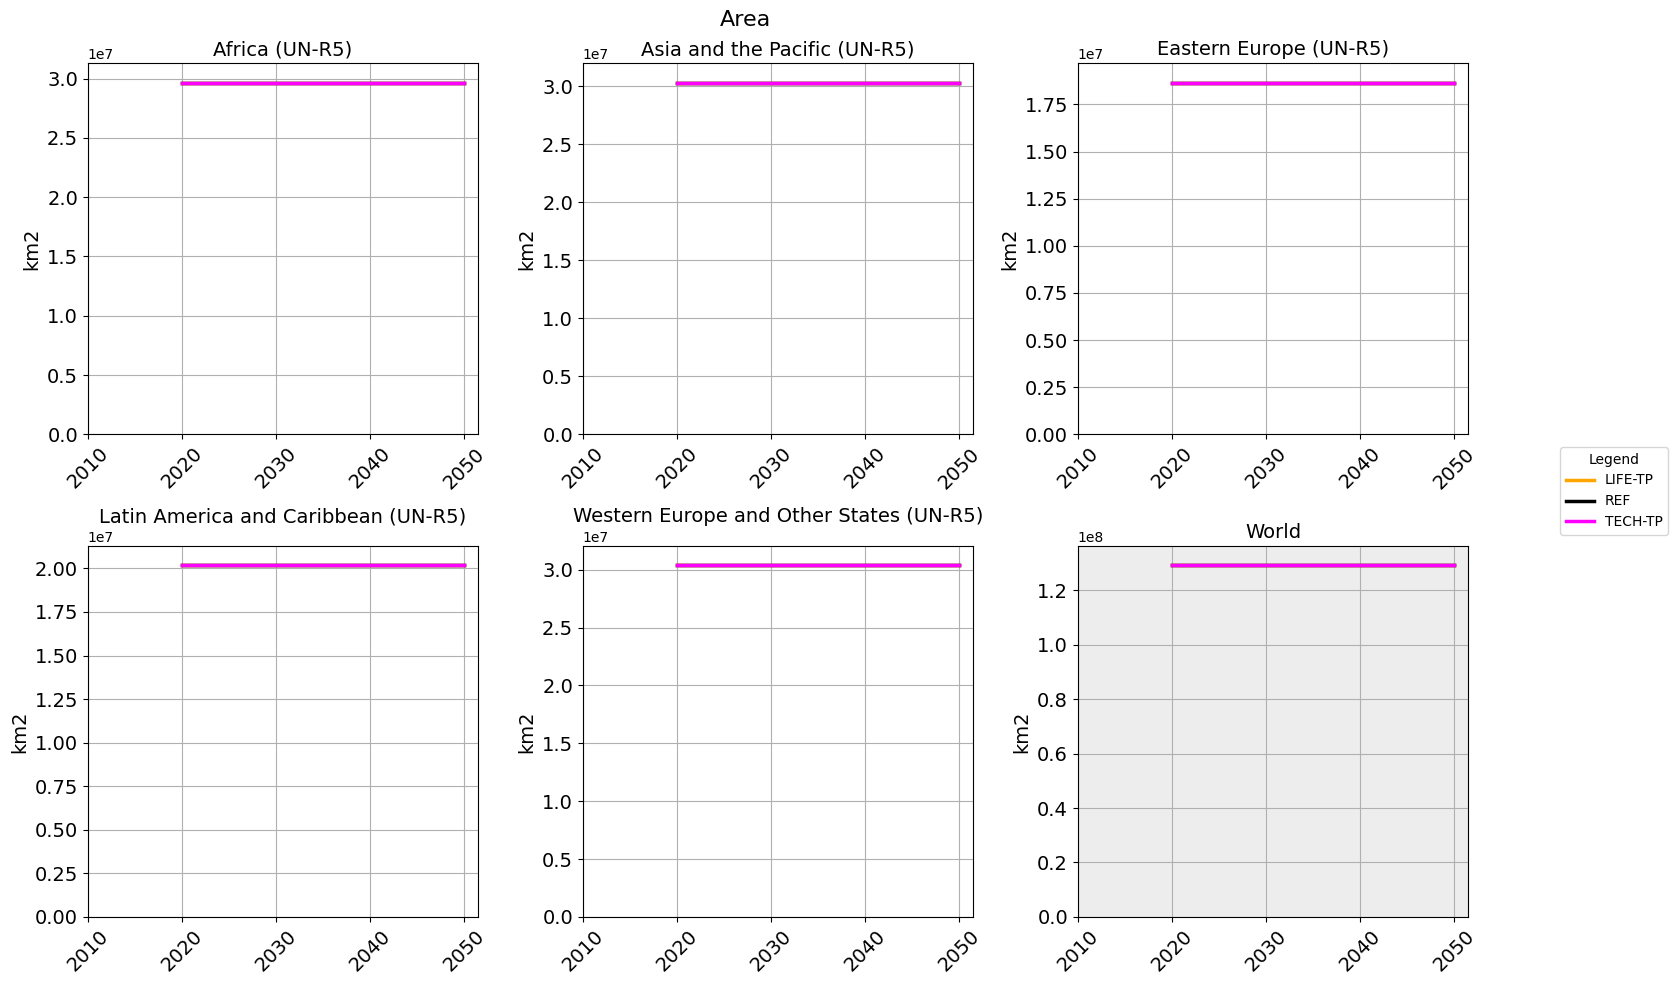

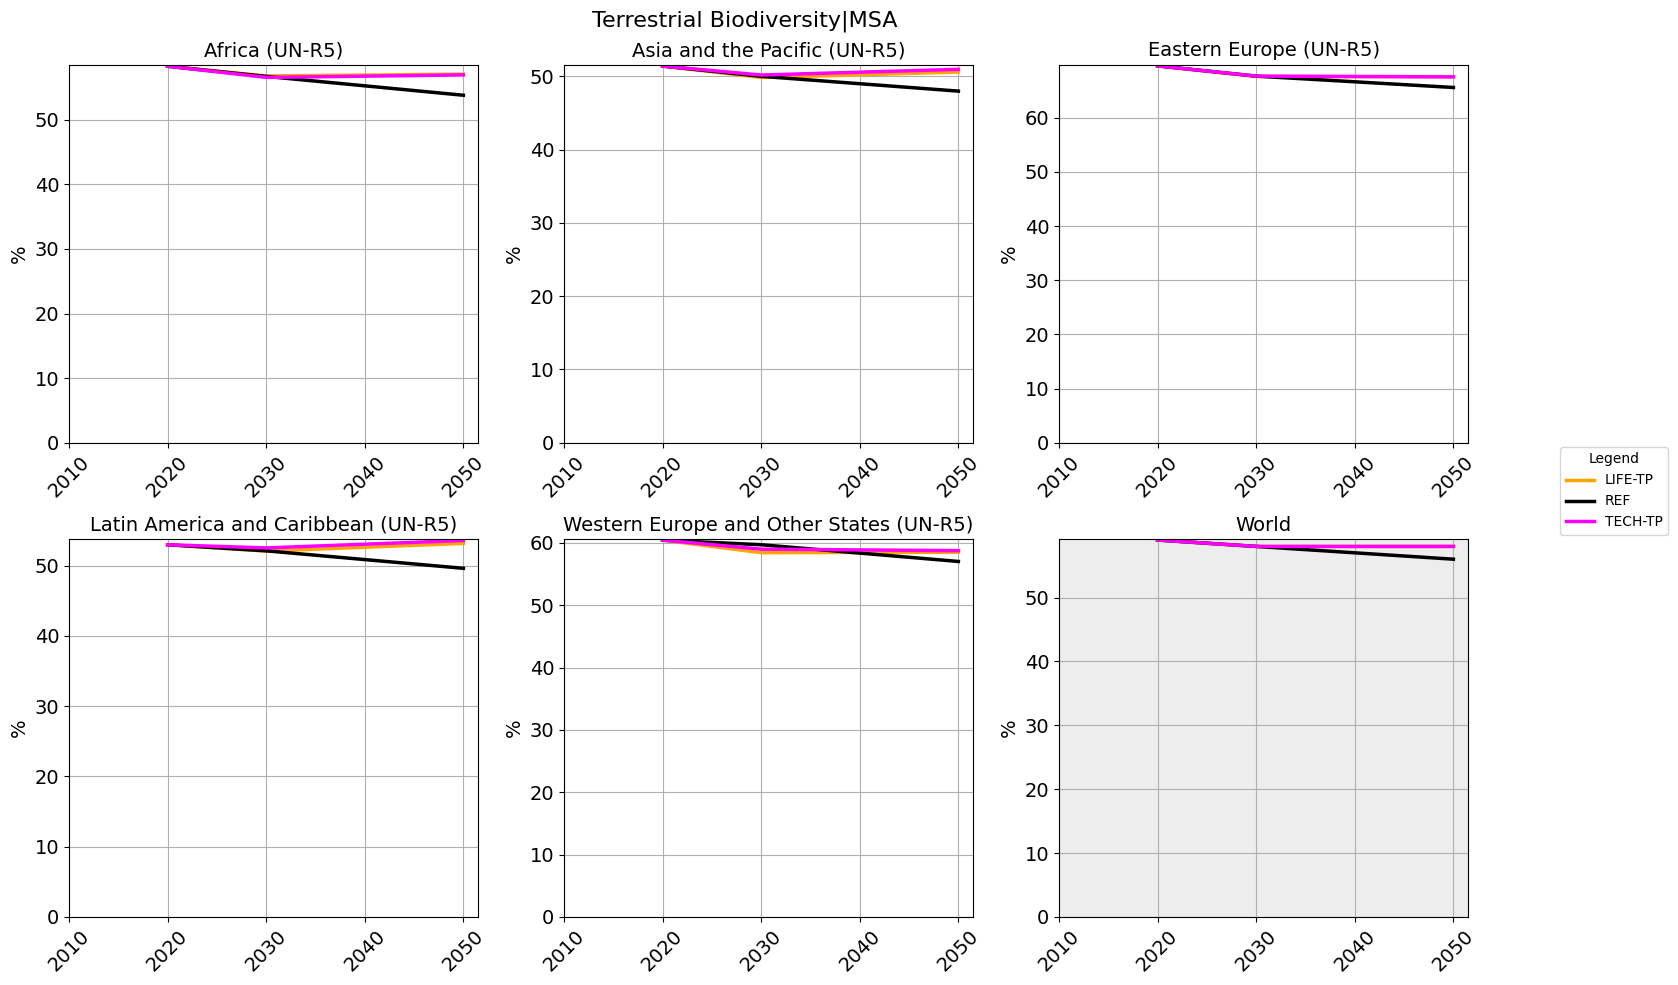

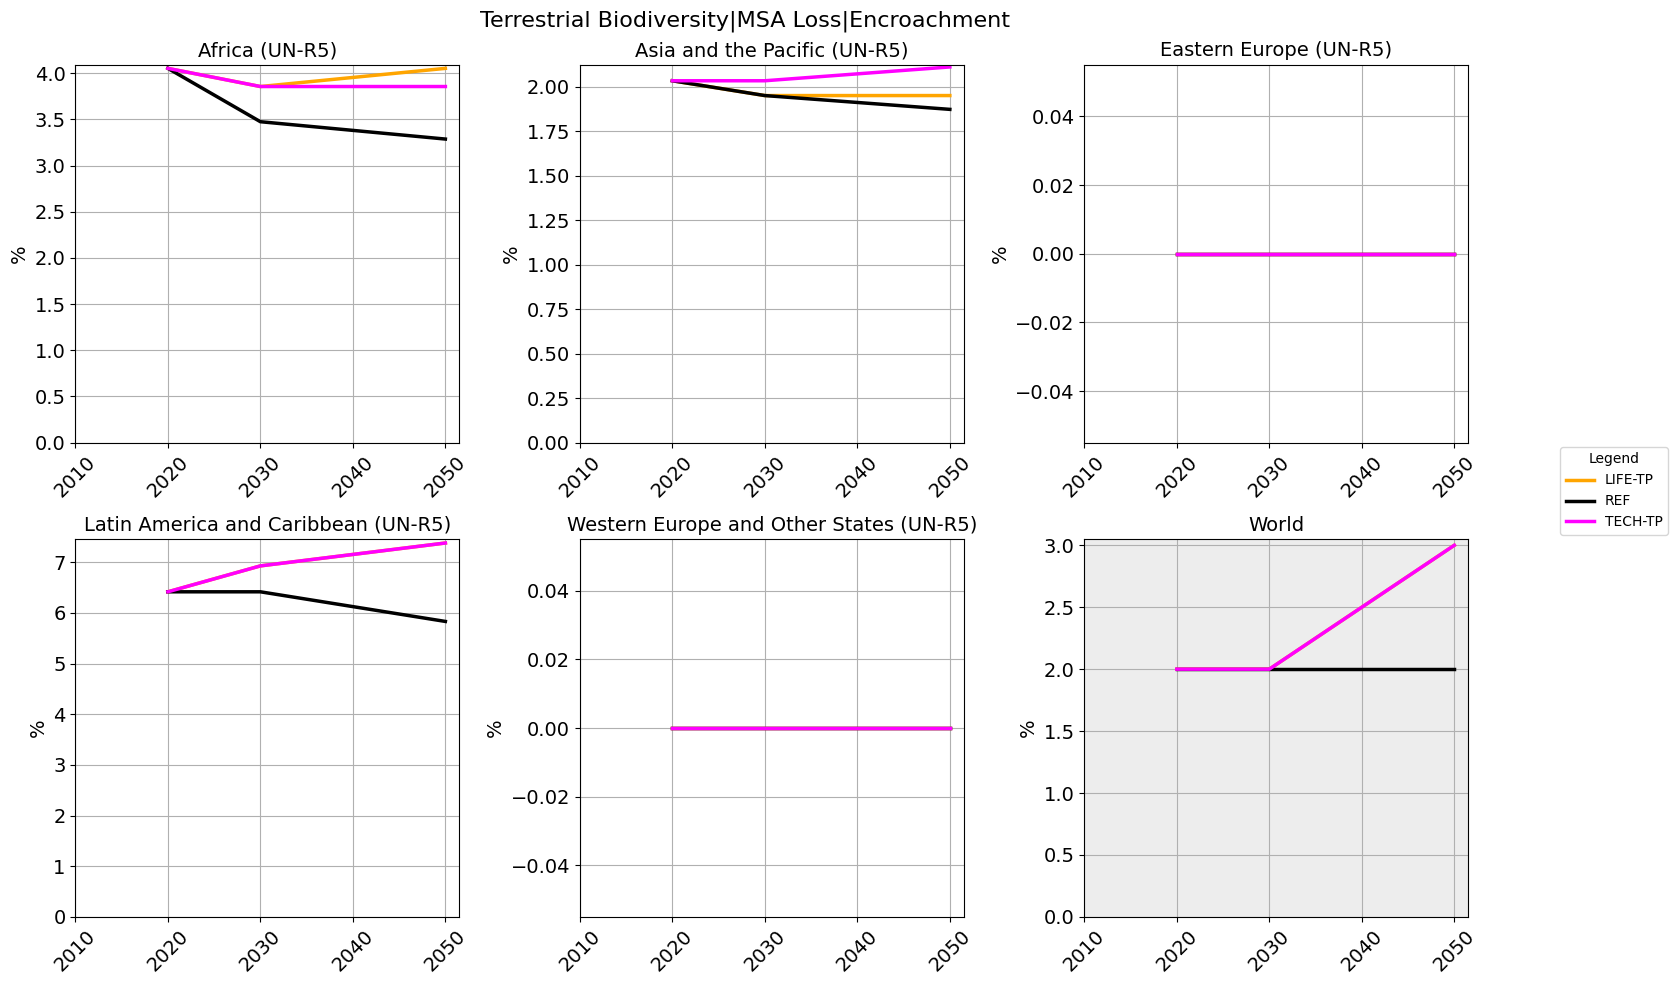

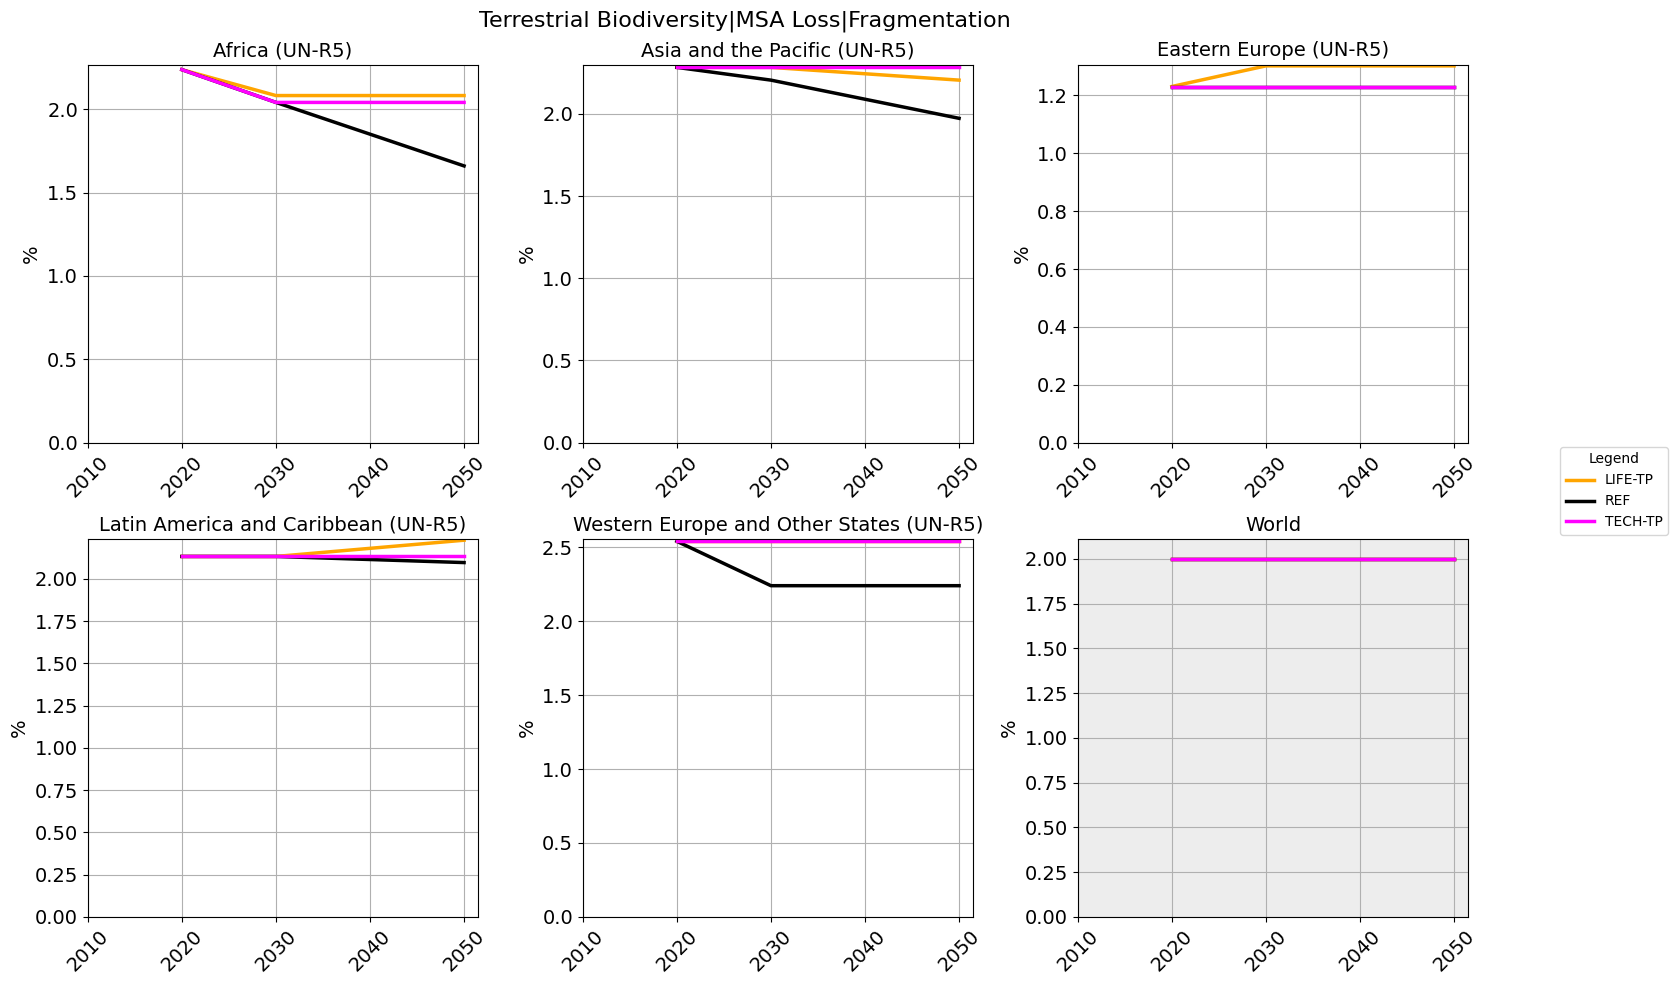

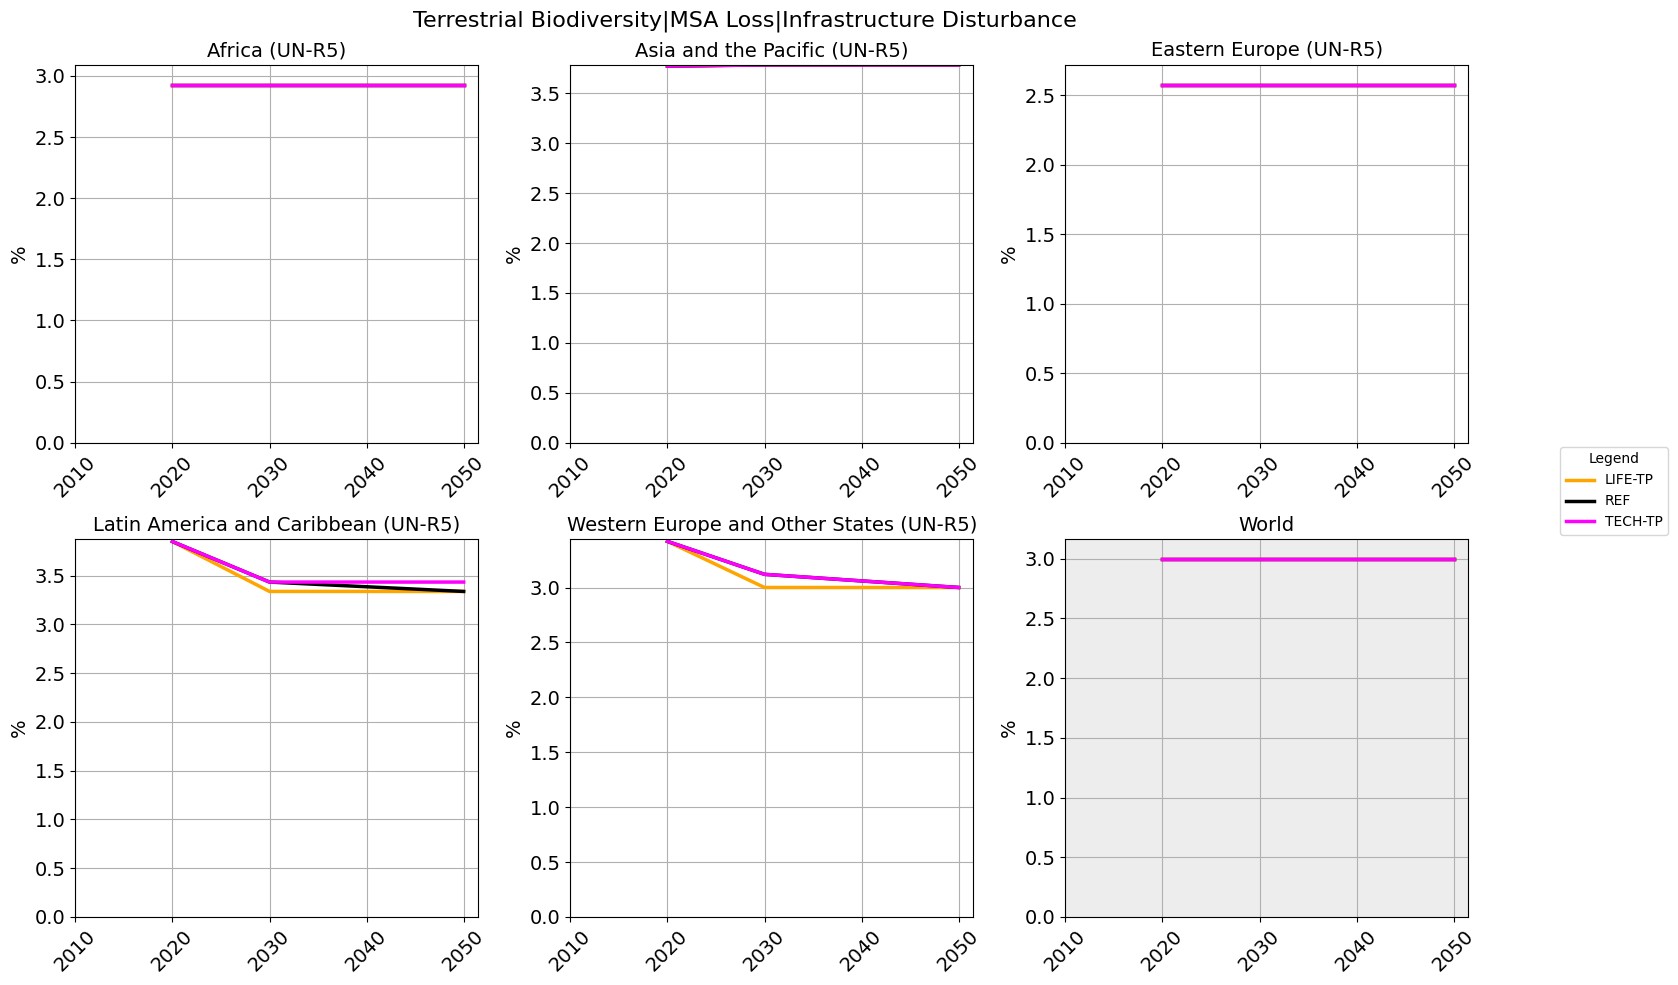

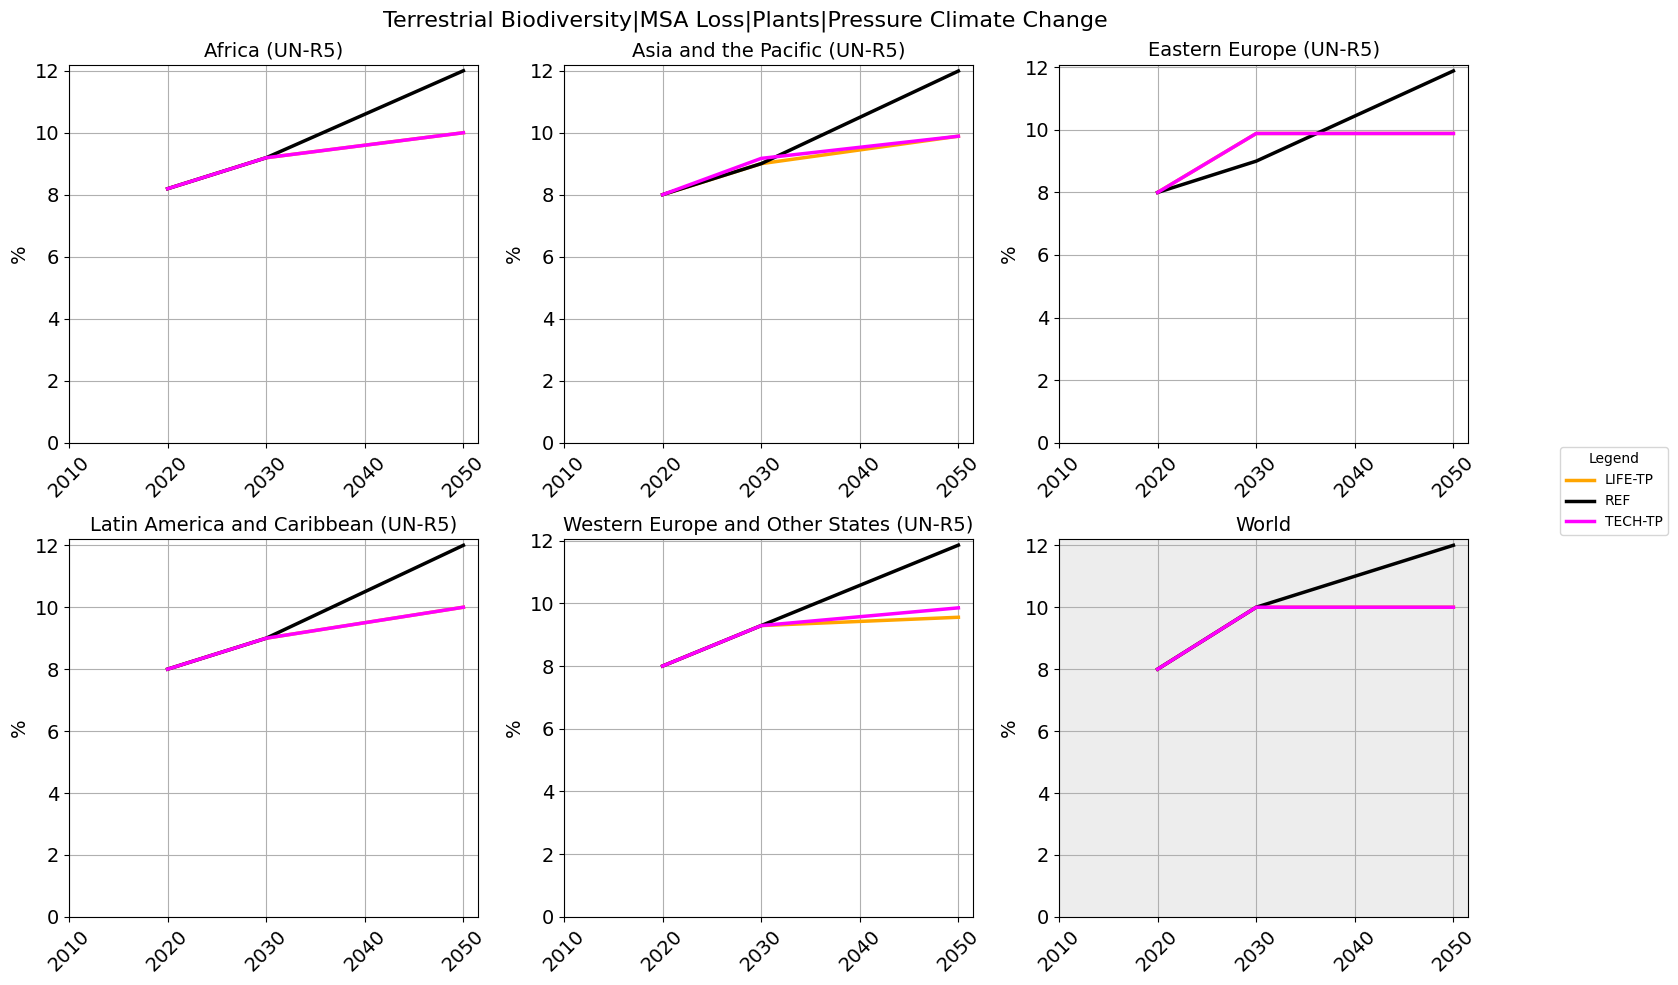

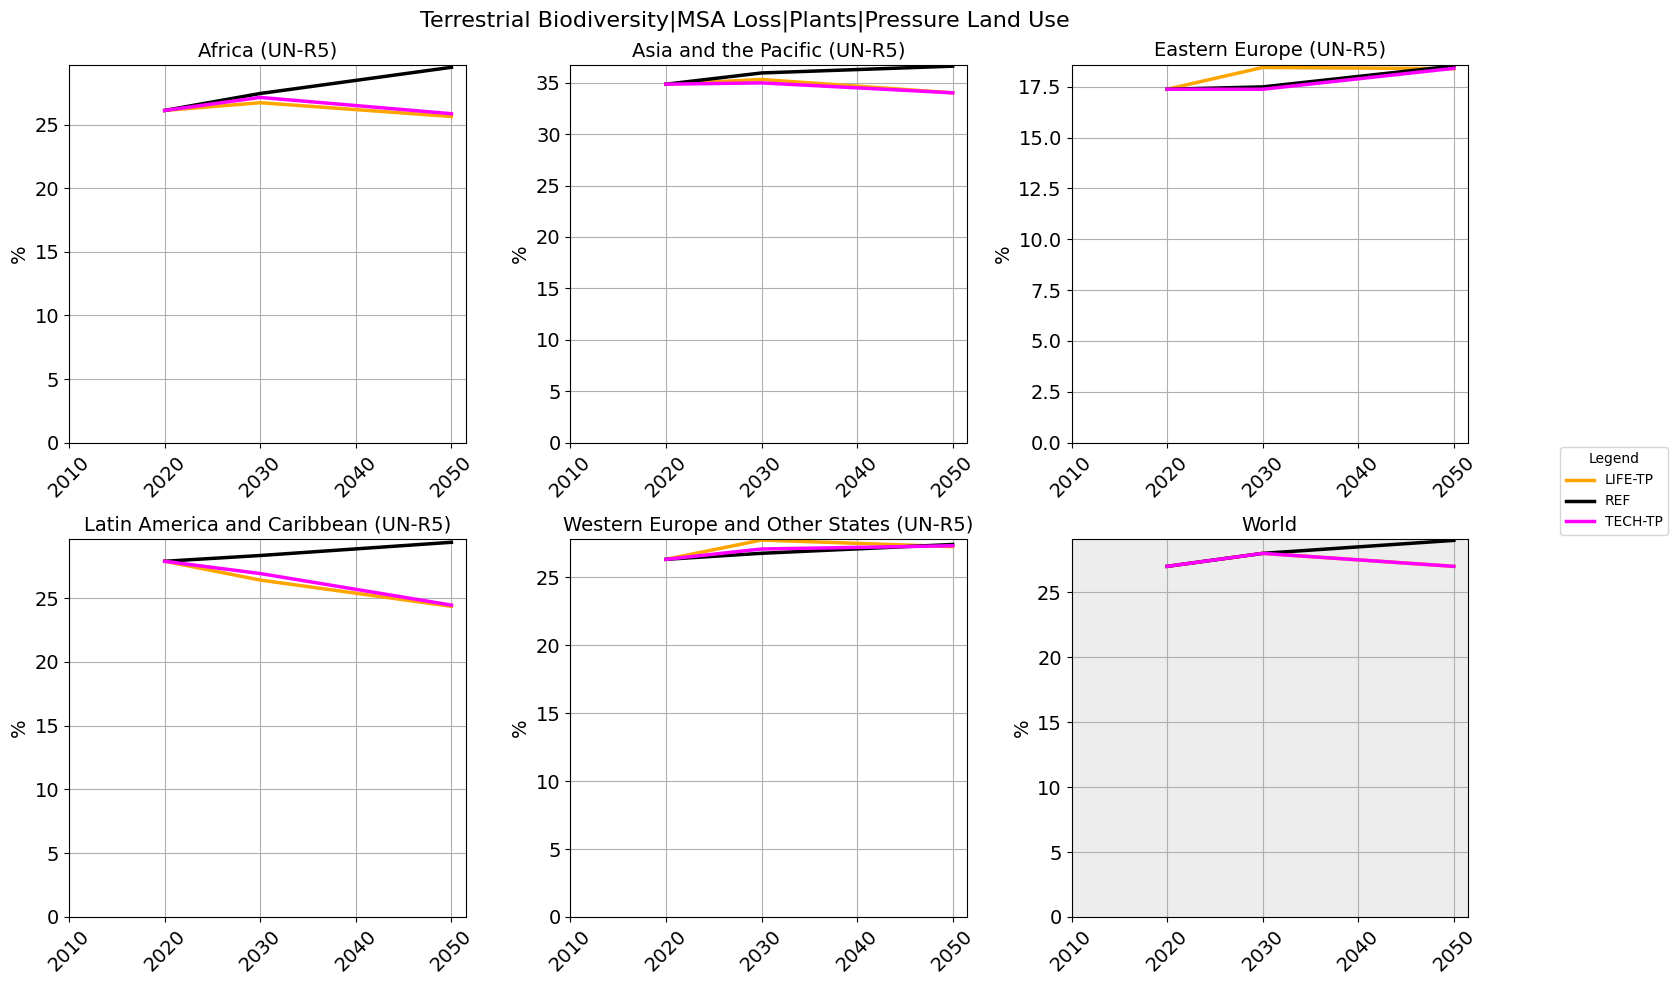

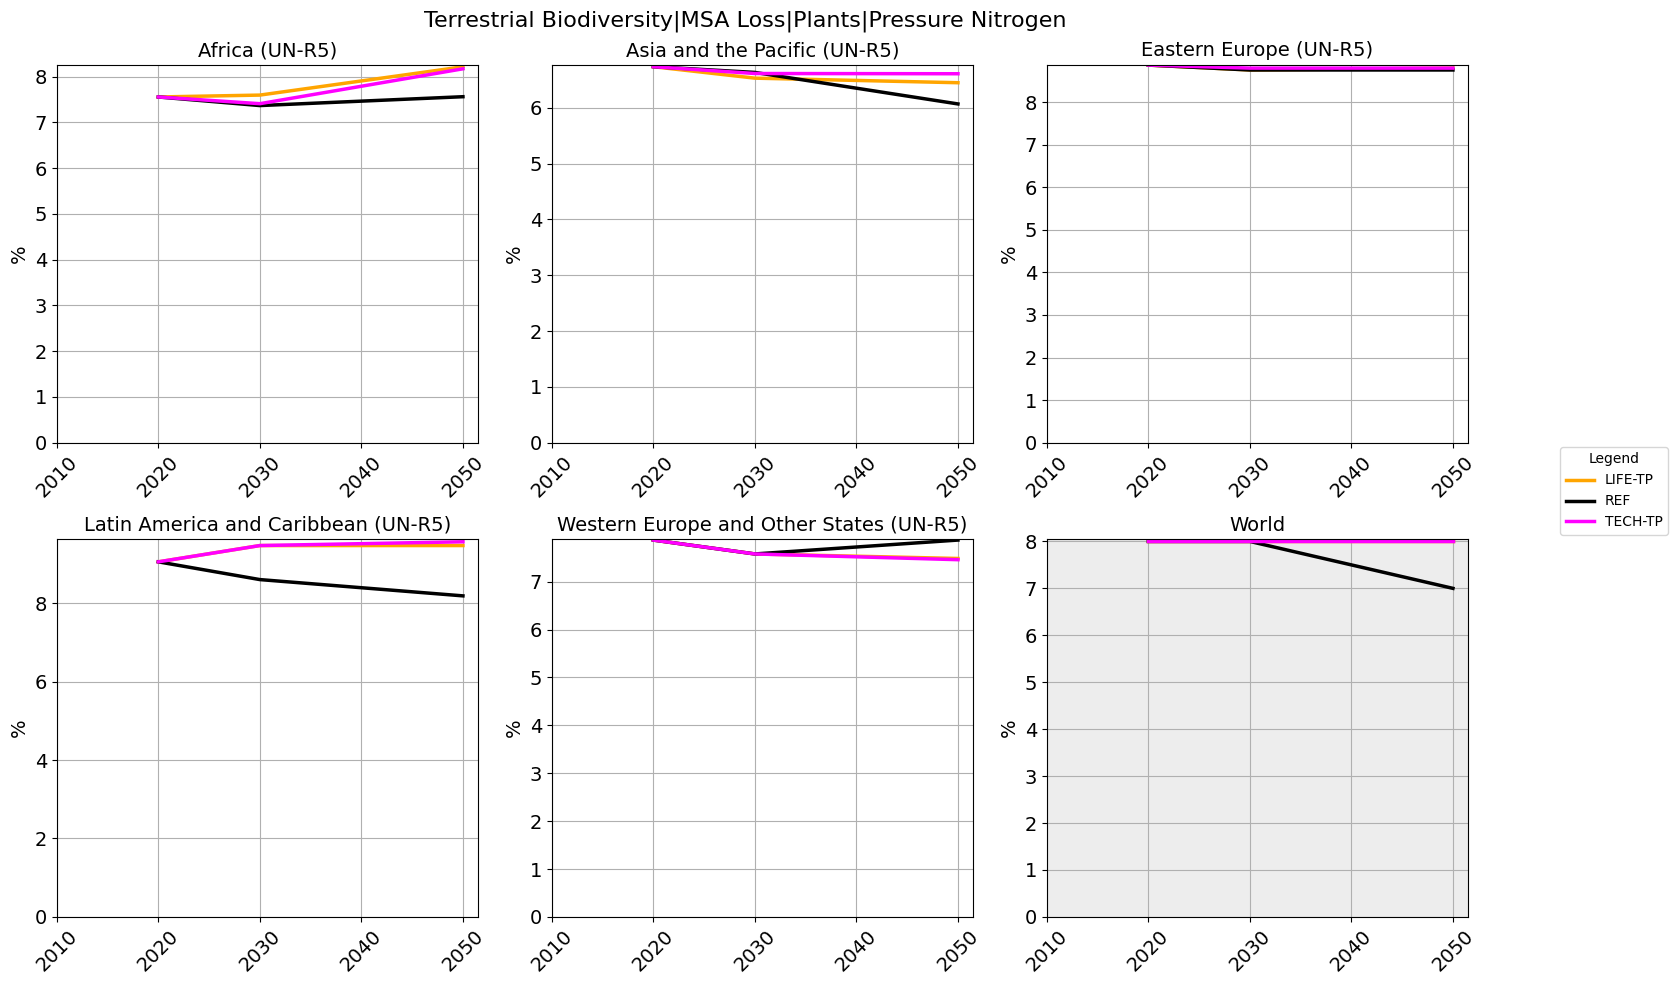

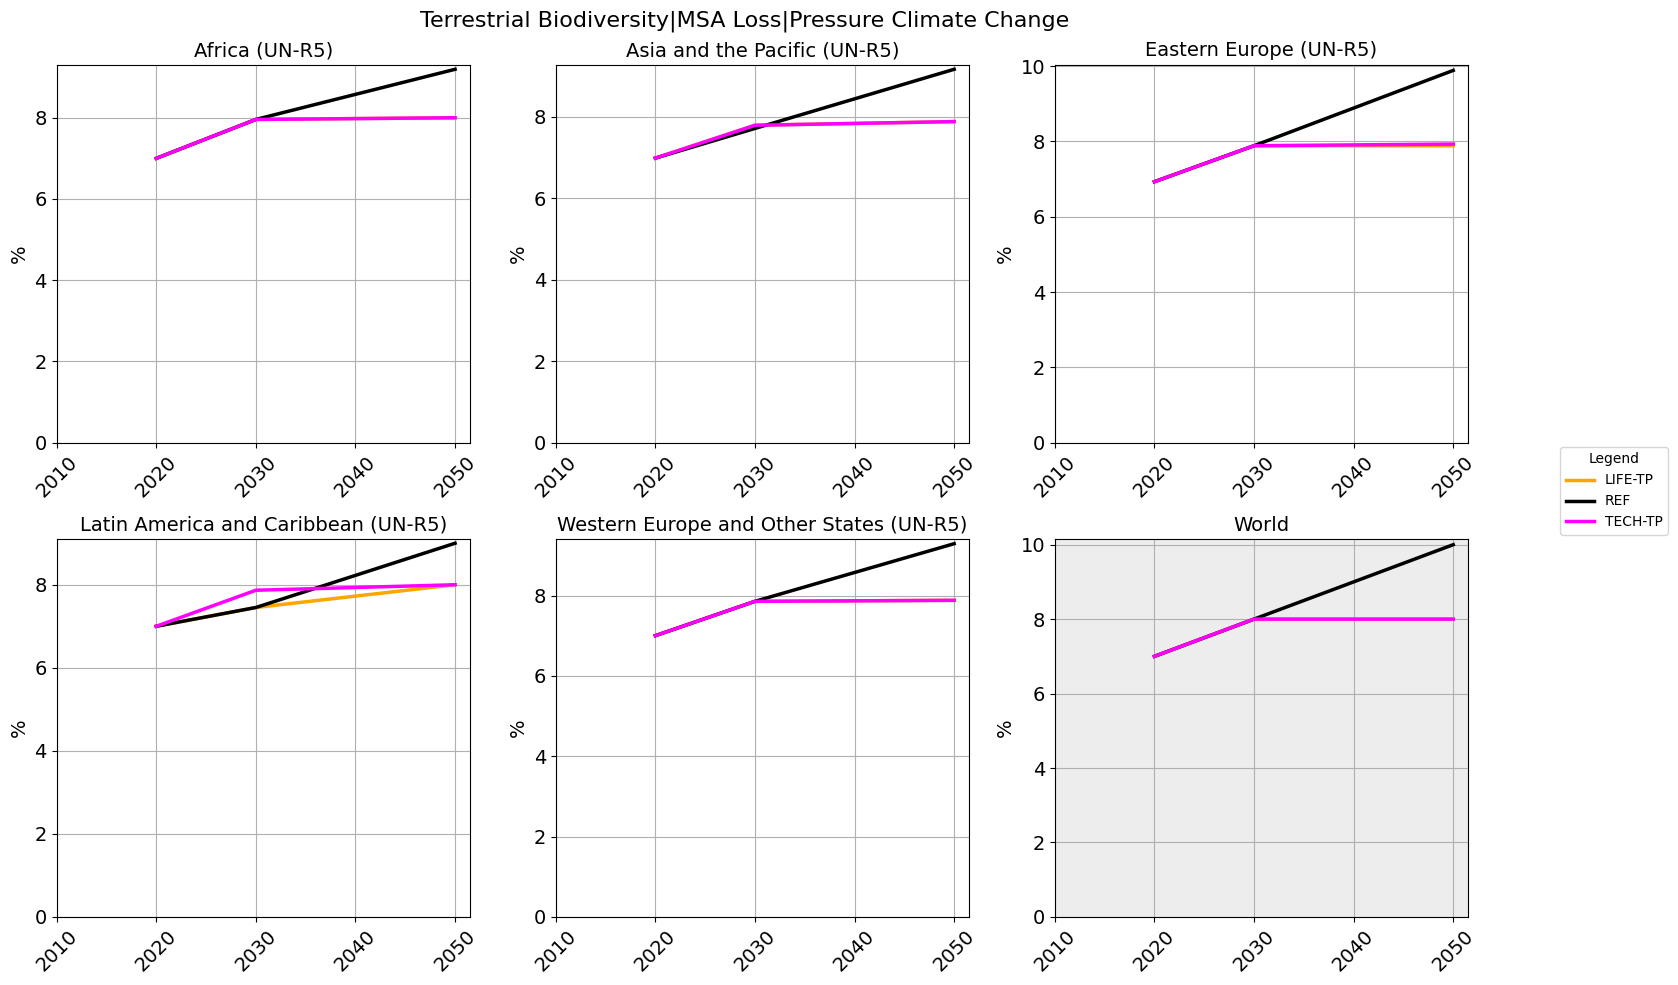

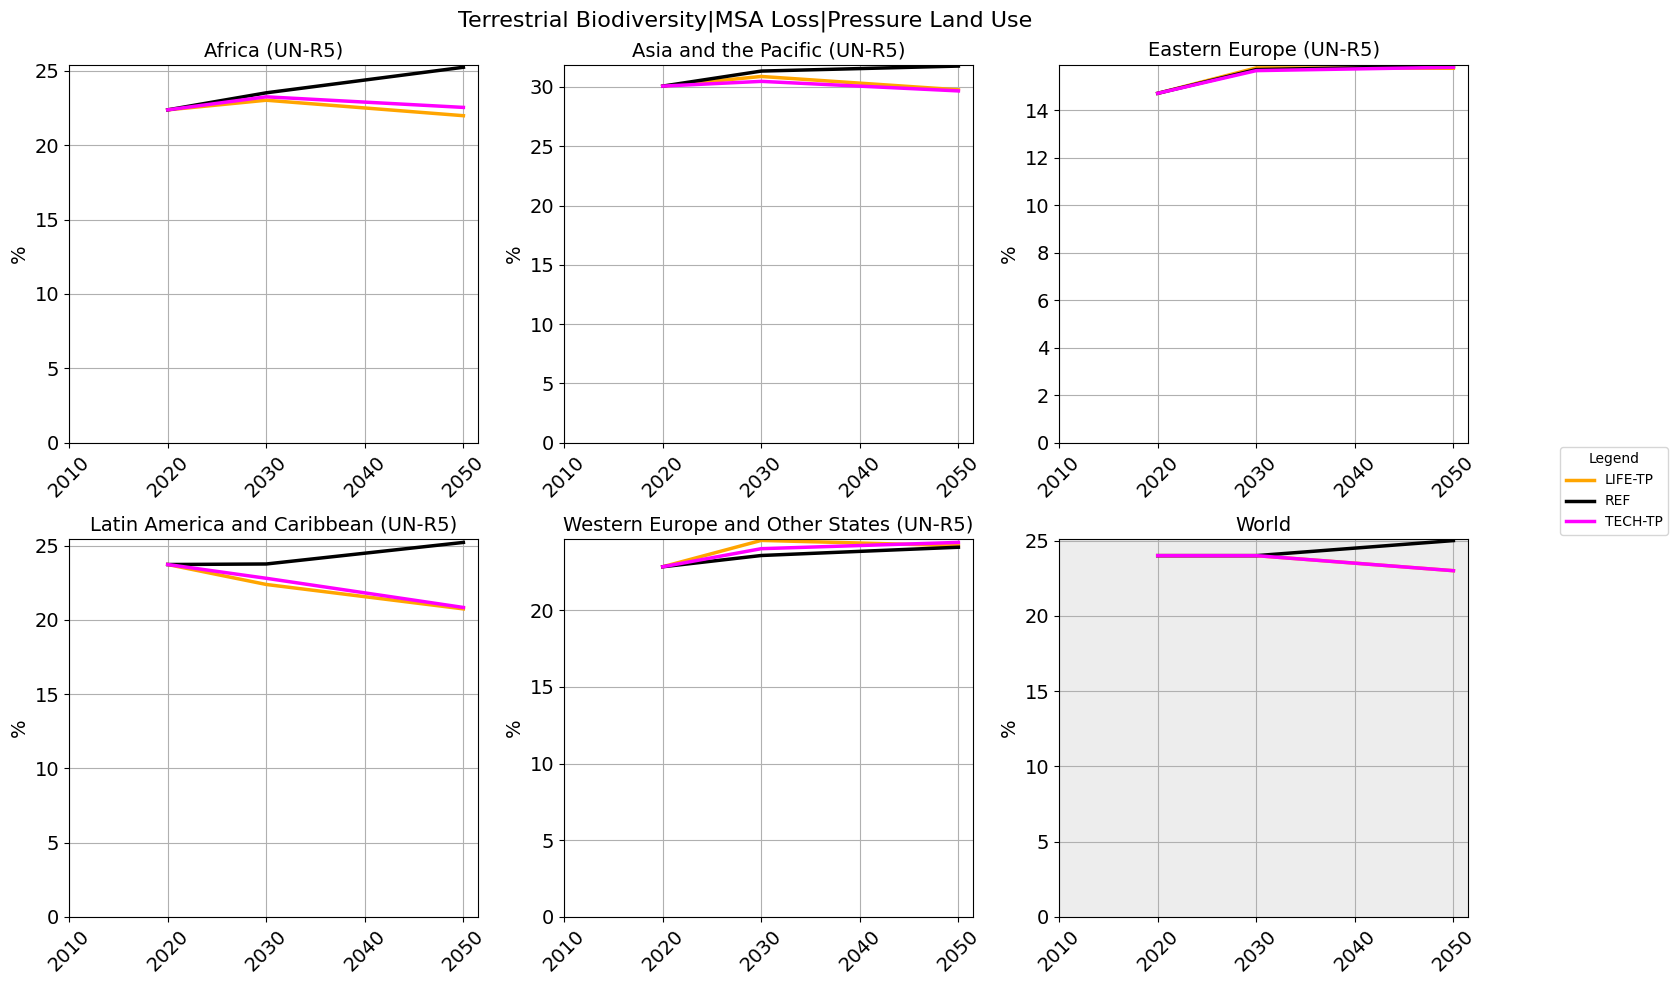

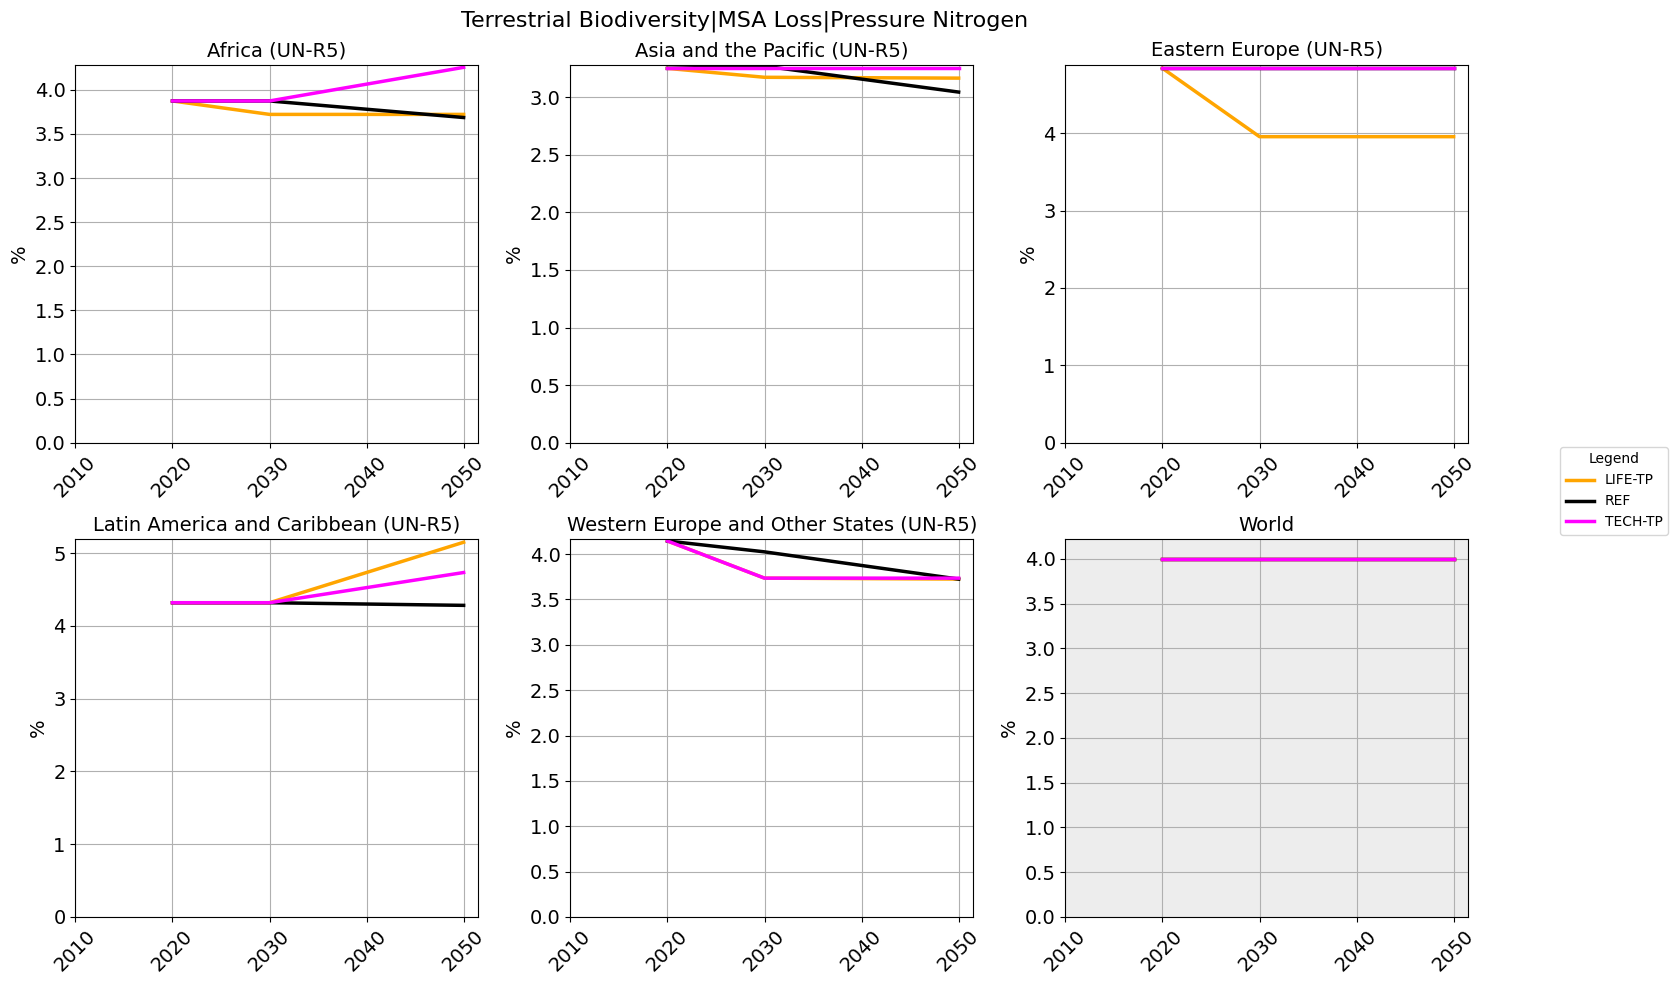

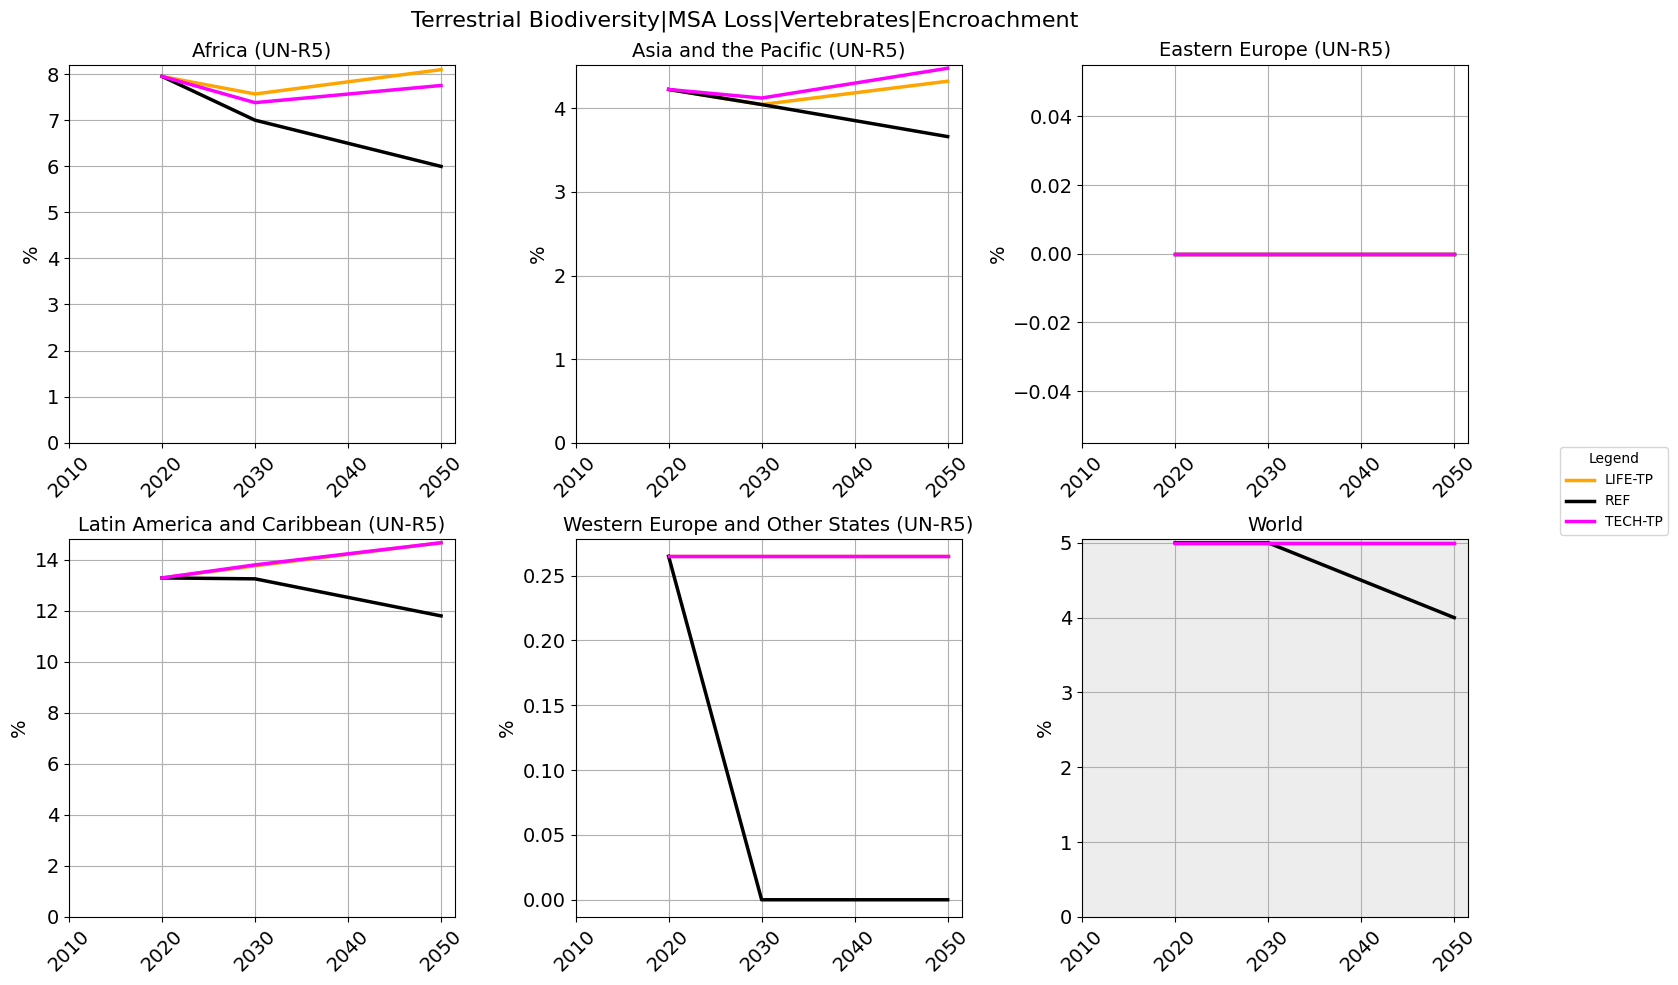

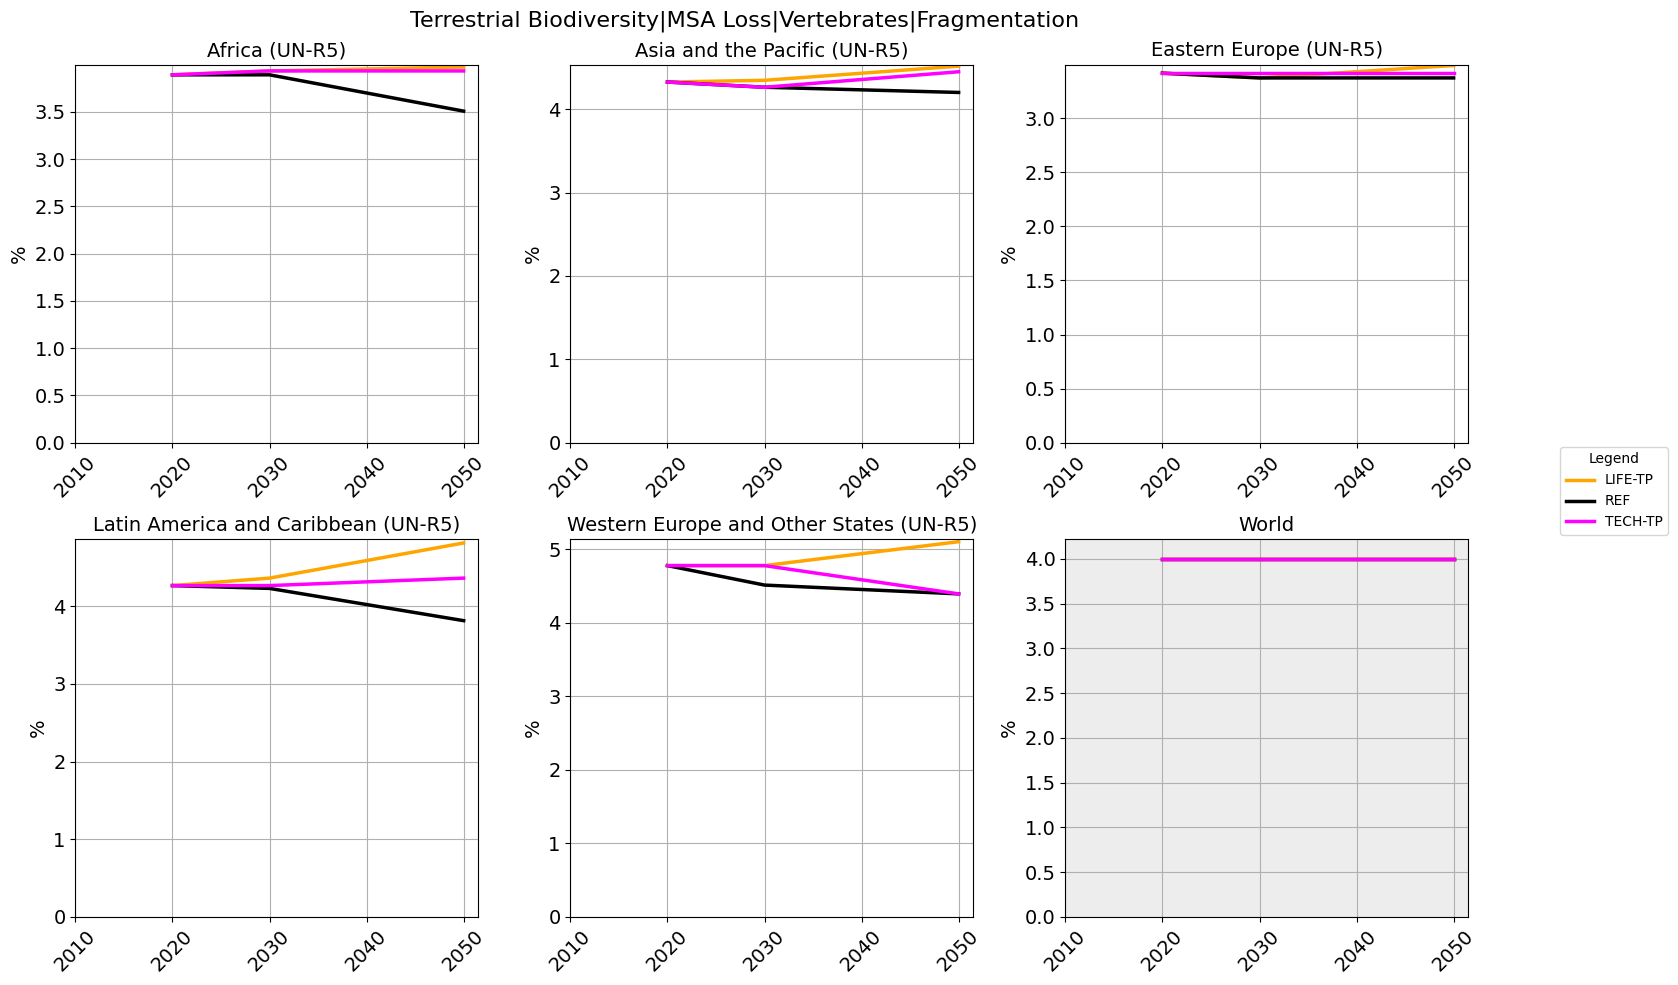

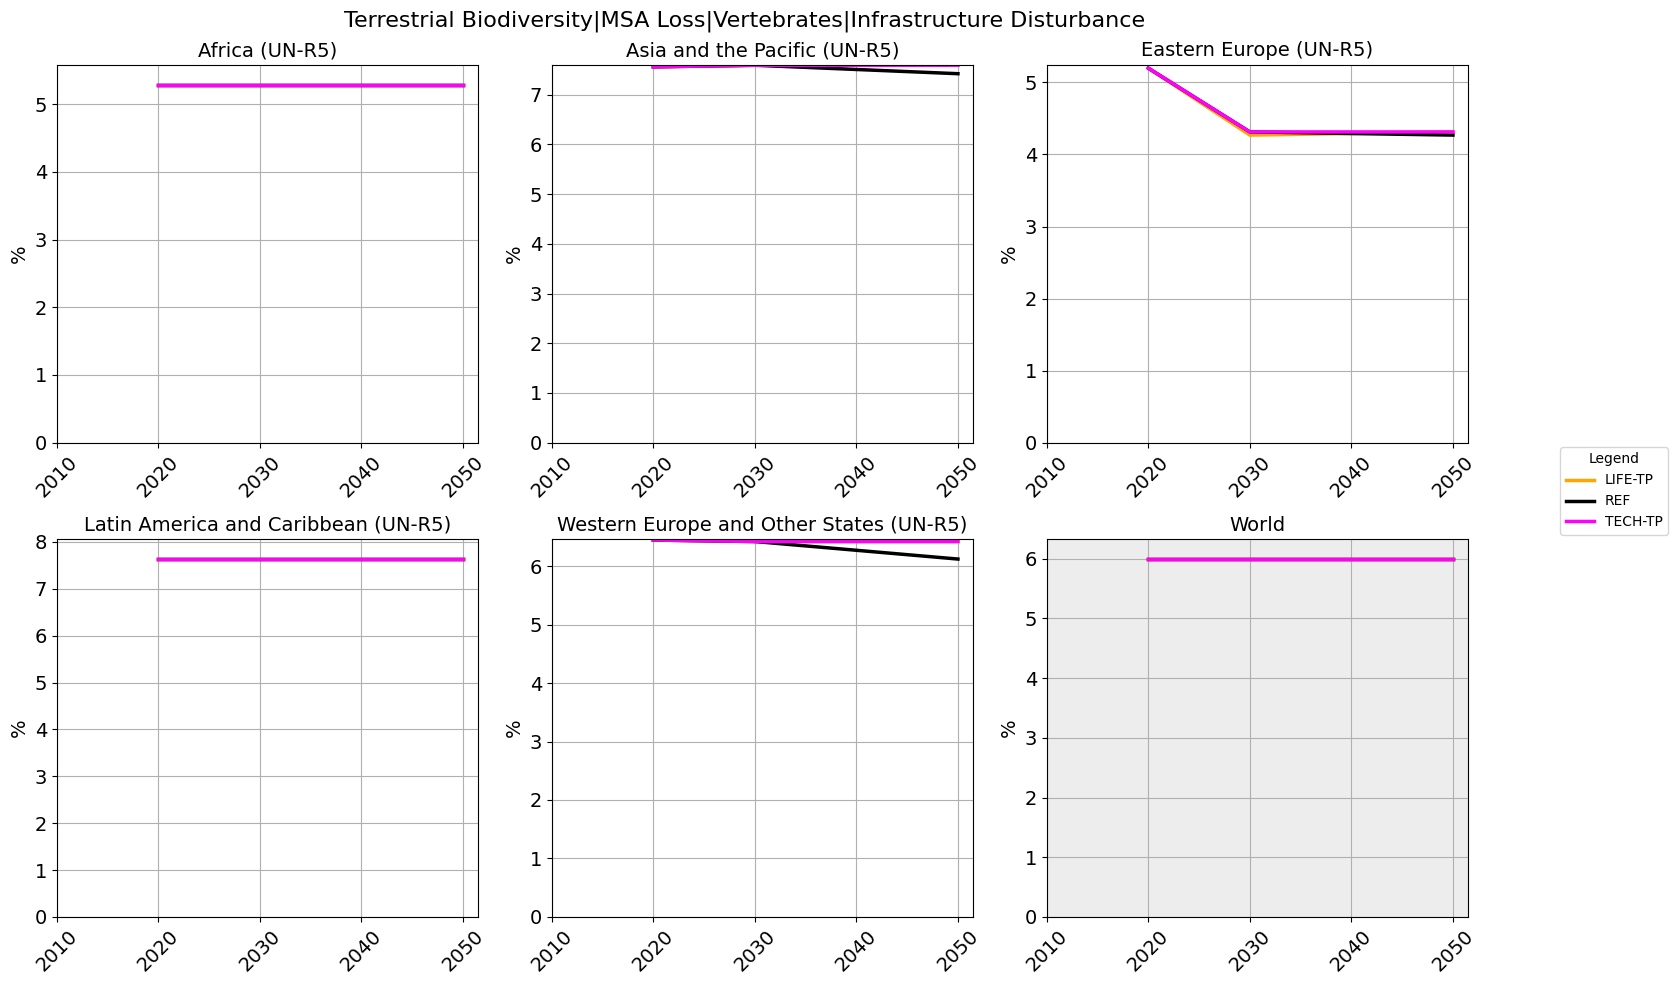

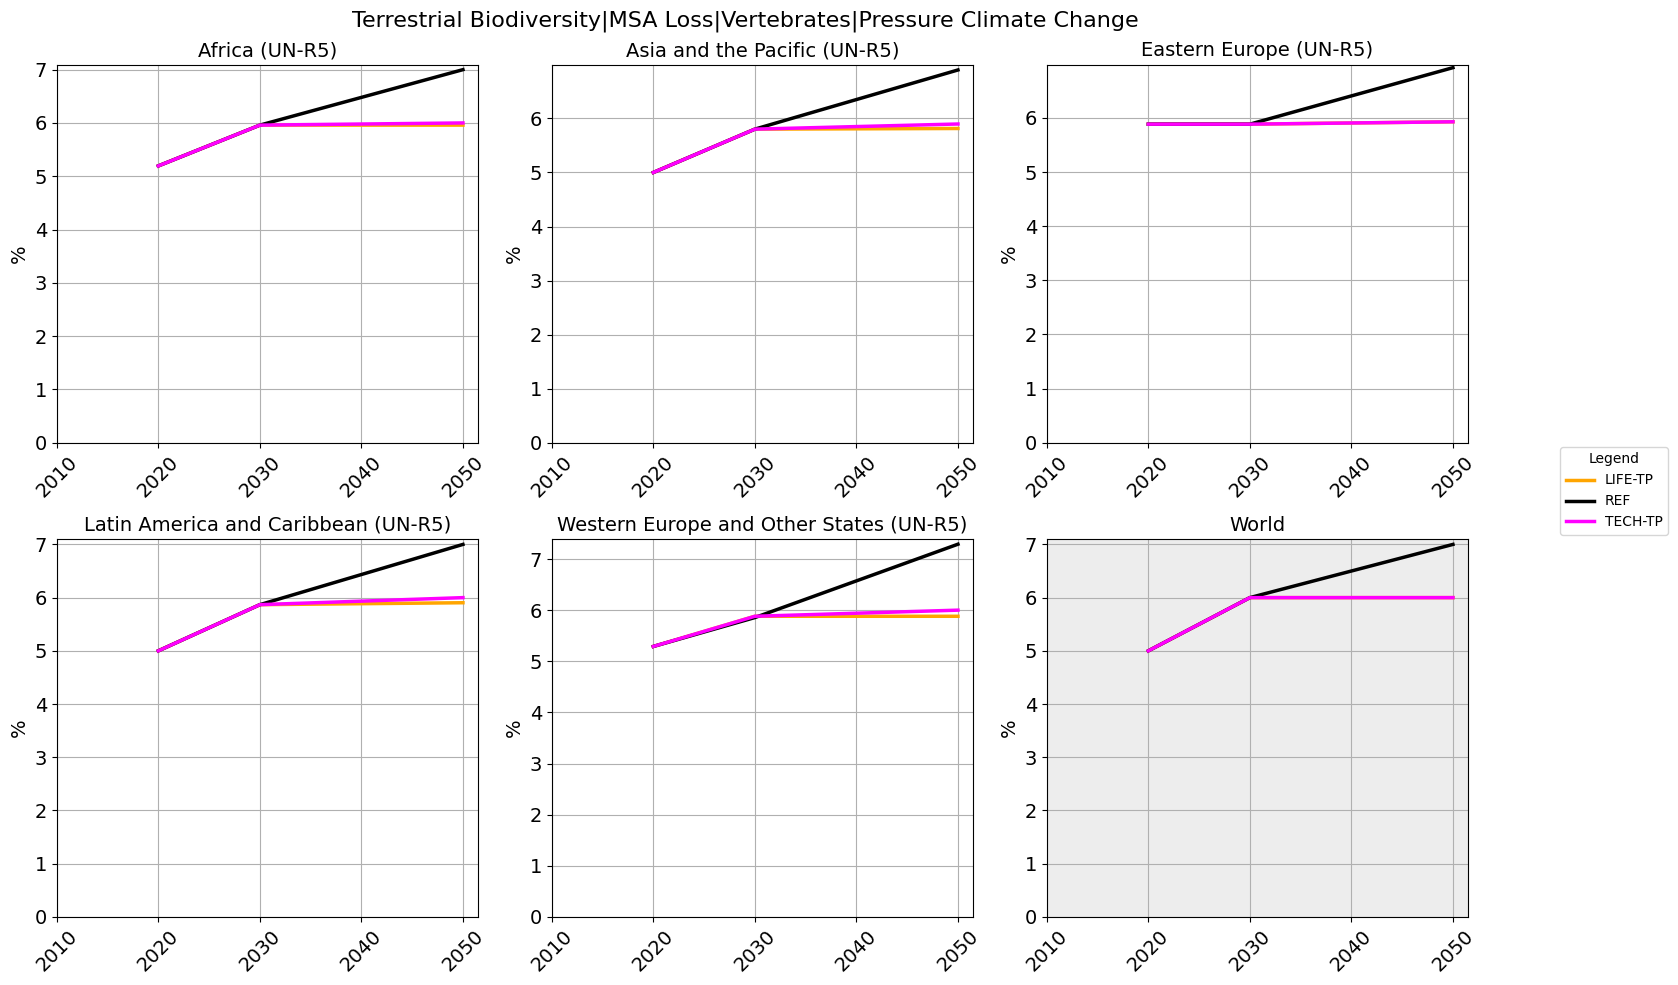

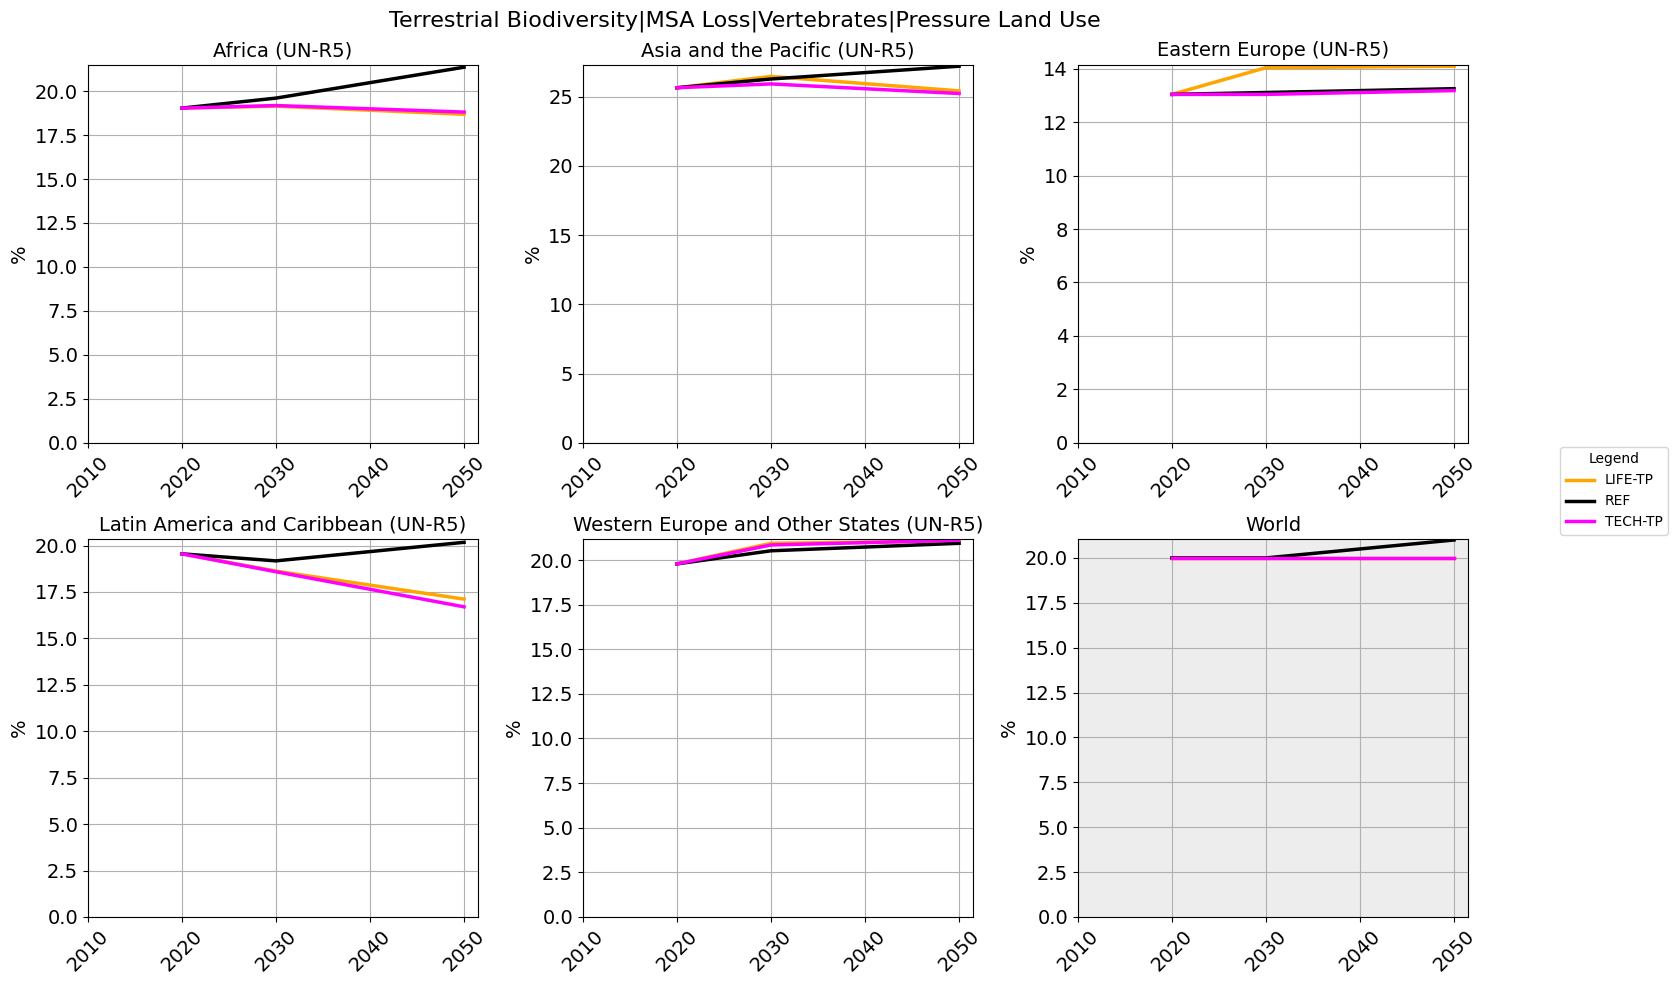

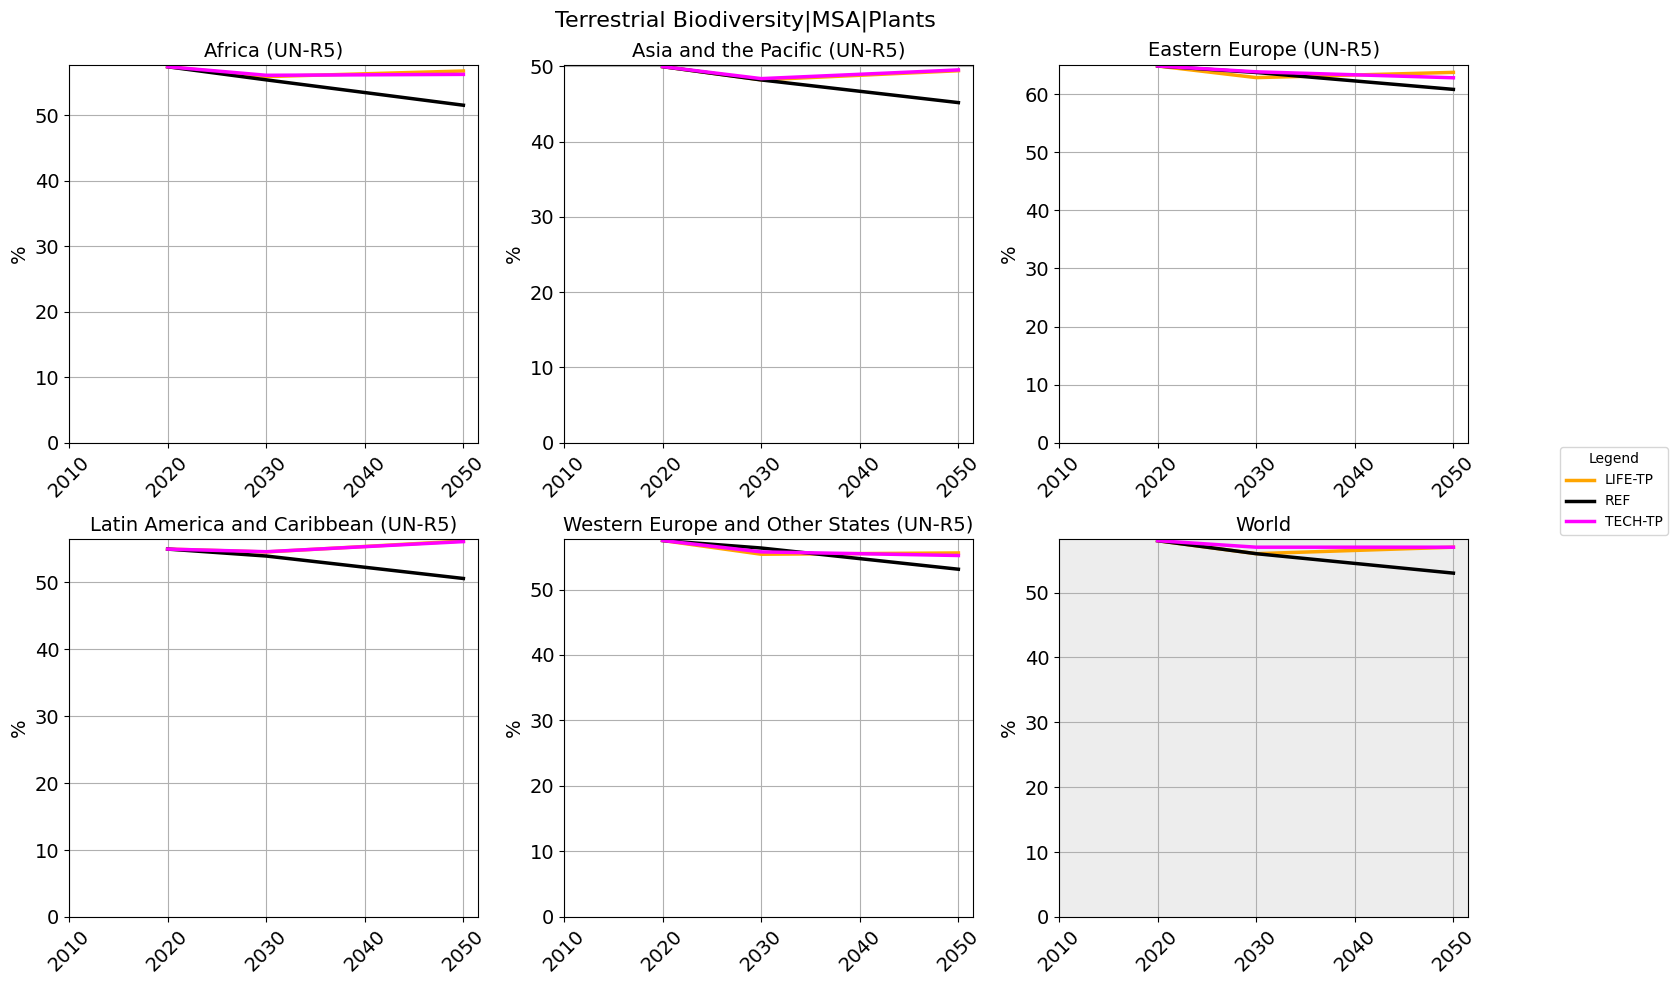

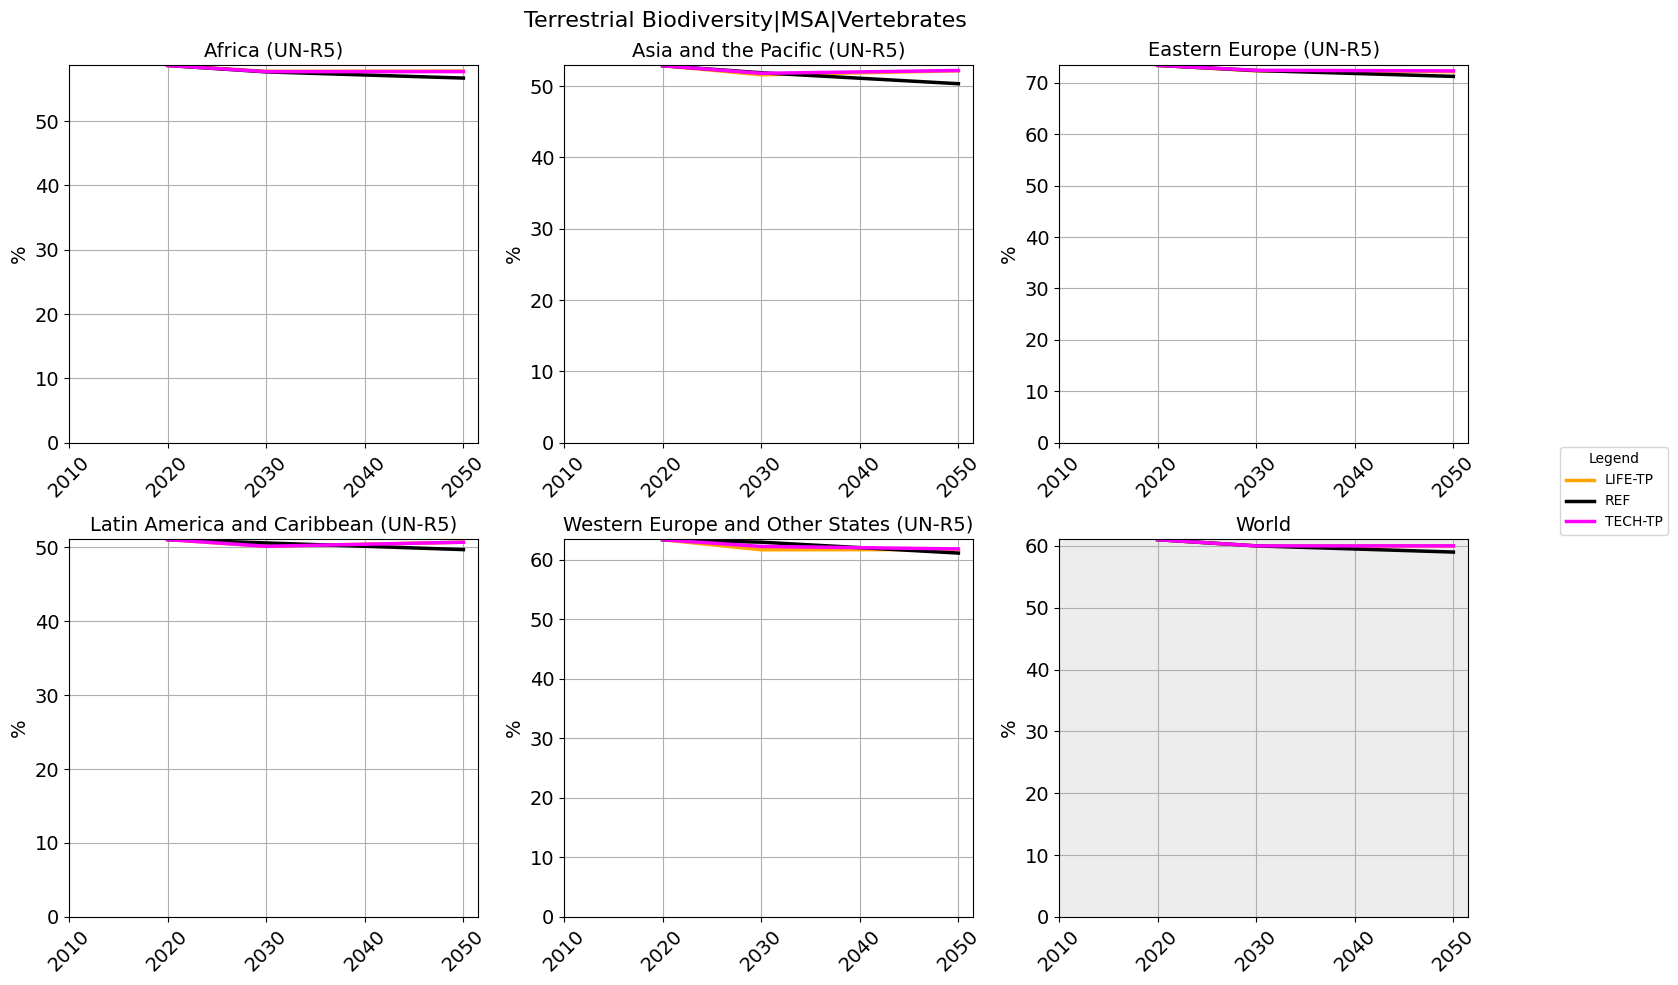

In [14]:
plot_data_3_x_3_figures(df_figures)